# Installing and importing necessary libraries

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
# Importing necessary libraries
import time, os, psutil, random, operator, gc
from IPython.display import display, HTML
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

import json
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

import string
import re
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer, WordPunctTokenizer, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import gensim

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=1cfdaa934cc2aa923c3f343089b5c89a037bf38ee51d7ca24c20352d1f869c5f
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.8 MB/s eta 0:00:00


# Data
## Source: https://www.kaggle.com/c/nlp-getting-started/data

The training dataset contains information on 7613
 tweets, each with a unique id, keyword (if available), location (if available), text and whether or not the tweet indicates a real disaster or not (expressed via a binary variable). The test dataset contains information on
 tweets with the same features as above except the status of real disaster, which is to be predicted. The features of the dataset are described below.

id : A unique identifier corresponding to the tweet

keyword : A highlighting word from the tweet

location : The location from where the tweet is sent

text: The textual content of the tweet

target : A binary variable, which is
 if the tweet does not indicate a real disaster and
 if it does

Note that the features keyword and location may be blank for many tweets.

In [ ]:
import pandas as pd
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [ ]:
data_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
print('The training set contains information on {} tweets.'.format(len(data_train)))
data_train[['id', 'text', 'target']]

The training set contains information on 7613 tweets.


,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [ ]:
print(f'The test set contains information on {len(data_test)} tweets.')

# Creating  copy of the dataset and add a 'target' column with '?'
data_test_target = data_test.copy()
data_test_target['target'] = '?'  # Placeholder for predictions

# Display Test Data
print(data_test_target[['id', 'text', 'target']].to_string())



The test set contains information on 3263 tweets.
         id                                                                                                                                                     text target
0         0                                                                                                                       Just happened a terrible car crash      ?
1         2                                                                                         Heard about #earthquake is different cities, stay safe everyone.      ?
2         3                                                         there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all      ?
3         9                                                                                                                 Apocalypse lighting. #Spokane #wildfires      ?
4        11                                                                               

# Function for data preprocessing

In [ ]:
# Function to used later during or after EDA

# Function to create a list of unique elements of a given list (in order of first appearance)
def unique(lst):
    list_unique = []
    for x in lst:
        if x not in list_unique:
            list_unique.append(x)
    return list_unique

# Function to convert float nan values to string
def nan_type_conv(lst):
    for i in range(len(lst)):
        if str(lst[i]) == 'nan':
            lst[i] = 'NaN'

# Word finder - Finding out if a specific word exists in a given list of words
def word_finder(word, lst):
    count = 0
    for x in lst:
        if x == word:
            count += 1
            break
    if count == 0:
        return False
    else:
        return True

# Word counter basic - Counting a specific word in a given list of words
def word_counter(word, lst):
    lst_word = [x for x in lst if x == word]
    return len(lst_word)

# Word counter dictionary - Creating a dictionary of unique words in a given list with their frequencies
def word_counter_dict(word_list):
    counter_dict = {}
    for word in word_list:
        if word not in counter_dict.keys():
            counter_dict[word] = 1
        else:
            counter_dict[word] += 1

    counter_dict_sorted = dict(sorted(counter_dict.items(), key = operator.itemgetter(1), reverse = True))
    return counter_dict_sorted

# Word counter dictionary - Creating a dictionary of unique words in a given list with their relative frequencies
def word_counter_dict_relative(word_list):
    counter_dict = {}
    for word in word_list:
        if word not in counter_dict.keys():
            counter_dict[word] = 1/len(word_list)
        else:
            counter_dict[word] += 1/len(word_list)

    counter_dict_sorted = dict(sorted(counter_dict.items(), key = operator.itemgetter(1), reverse = True))
    return counter_dict_sorted

# Function to convert a given dictionary into a dataframe with given column names
def dict_to_df(dictionary, C1, C2):
    df = pd.DataFrame(dictionary.items(), columns=[C1, C2])
    return df

# Word counter dataframe - Creating a dataframe of unique words in a given list with their frequencies
def word_counter_df(word_list):
    return dict_to_df(word_counter_dict(word_list), "Word", "Frequency")

# Word counter dataframe - Creating a dataframe of unique words in a given list with their relative frequencies
def word_counter_df_relative(word_list):
    return dict_to_df(word_counter_dict_relative(word_list), "Word", "Relative Frequency")

# Function to convert a given list of pairs into a dictionary
def list_to_dict(lst):
    dct = {lst[i][0]: lst[i][1] for i in range(len(lst))}
    return dct

# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

# List of punctuations except the apostrophe
punctuation_list = [w for w in punctuation if w not in ["'"]]

# Function to compute list of punctuations that are present in a given text
def text_punct(text):
    x = word_tokenize(text)
    punct_list = [w for w in x if w in punctuation_list]
    return punct_list

# Function to compute list of words that are present in a given list of texts
def text_list_words(text_list):
    word_list = []
    for text in text_list:
        word_list = word_list + regexp.tokenize(text)
    return word_list

# Function to compute list of punctuations that are present in a given list of texts
def text_list_punct(text_list):
    punct_list = []
    for text in text_list:
        punct_list = punct_list + text_punct(text)
    return punct_list

# Function to compute count per text of all unique words in a given list of texts
def word_count_per_text(text_list):
    word_list = text_list_words(text_list) # list of words
    word_count_dict = word_counter_dict(word_list) # dictionary of unique words and frequencies
    for word in word_count_dict.keys():
        word_count_dict[word] = word_count_dict[word]/len(text_list) # converting frequency to count per sentence
    return word_count_dict

# Function to produce donutplot
def donutplot(value, label, color, title):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_axes([0.0, 0.1, 1.0, 0.5], aspect = 1)
    pie = ax.pie(value, colors = color, autopct = "%1.1f%%", startangle = 90) # labels = label
    centre_circle = plt.Circle((0, 0), 0.8, fc = "white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.suptitle(title, y = 0.65, fontsize = 12)
    plt.legend(pie[0], label, loc = "upper left")
    plt.show()

# Function to visualise classwise comparison - joint barplot
def classwise_comparison_barplot(df, n, feature, non_disaster, disaster, xlabel, ylabel, title):

    labels = df.head(n).iloc[::-1][feature]
    feature_non_disaster = df.head(n).iloc[::-1][non_disaster]
    feature_disaster = df.head(n).iloc[::-1][disaster]

    location = np.arange(len(labels)) # location points of the labels
    width = 0.35 # width of the bars

    fig, ax = plt.subplots()
    fig = plt.gcf()
    fig.set_size_inches(13, 13)
    bar1 = ax.barh(location - (width / 2), feature_non_disaster, width, label = "Non-disaster tweets")
    bar2 = ax.barh(location + (width / 2), feature_disaster, width, label = "Disaster tweets")

    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)
    ax.set_title(title, fontsize = 16)
    ax.set_yticks(location)
    ax.set_yticklabels(labels)
    ax.legend()
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)

    fig.tight_layout()
    plt.show()

# Function to visualise classwise comparison of feature distribution - histograms in two separate subplots
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6.5))

    xmin = np.min([feature_train_0.min(), feature_train_1.min()])
    xmax = np.max([feature_train_0.max(), feature_train_1.max()])

    sns.histplot(feature_train_0, ax = ax1, color = "green", binwidth = binwidth)
    ax1.set_title(title_0, fontsize = 14)
    ax1.set_xlim([xmin - 0.5, xmax + 0.5])
    ax1.set_ylim([0, ylimit])
    ax1.set_xlabel(xlabel, fontsize = 14)
    ax1.set_ylabel(ylabel, fontsize = 14)

    sns.histplot(feature_train_1, ax = ax2, color = "red", binwidth = binwidth)
    ax2.set_title(title_1, fontsize = 14)
    ax2.set_xlim([xmin - 0.5, xmax + 0.5])
    ax2.set_ylim([0, ylimit])
    ax2.set_xlabel(xlabel, fontsize = 14)
    ax2.set_ylabel("")

    fig.suptitle(suptitle, y = 1.0, fontsize = 16)
    plt.show()

# Visualization of embedding
def plot_embedding(test_data, test_labels): # savepath = "filename.csv"
        truncated_SVD = TruncatedSVD(n_components = 2)
        truncated_SVD.fit(test_data)
        scores = truncated_SVD.transform(test_data)
        color_mapper = {label:idx for idx, label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ["red", "blue", "blue"]

        plt.scatter(scores[:, 0], scores[:, 1], s = 8, alpha = 0.8, c = test_labels,
                        cmap = matplotlib.colors.ListedColormap(colors))
        red_patch = mpatches.Patch(color = "red", label = "Non-disaster tweet")
        green_patch = mpatches.Patch(color = "blue", label = "Disaster tweet")
        plt.legend(handles=[red_patch, green_patch], prop={"size" : 12})

# Confusion matrix
def confusion_matrix(y_test, y_pred):
    class_names = ["Non-disaster", "Disaster"]
    tick_marks_y = [0.5, 1.5]
    tick_marks_x = [0.5, 1.5]
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, range(2), range(2))
    plt.figure(figsize = (6, 4.75))
    sns.set(font_scale = 1.4) # label size
    plt.title("Confusion Matrix")
    sns.heatmap(conf_matrix_df, annot = True, annot_kws = {"size" : 16}, fmt = 'd') # font size
    plt.yticks(tick_marks_y, class_names, rotation = "vertical")
    plt.xticks(tick_marks_x, class_names, rotation = "horizontal")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.grid(False)
    plt.show()

# F1-score
def f1_score(y_test, y_pred):
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]
    F1 = TP/(TP + (0.5*(FP + FN)))
    return F1

# Function to display dataframes side by side
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

def avg_f1_score_list(X, y):
    cv = RepeatedStratifiedKFold(n_splits = 6, n_repeats = 5, random_state = 0)
    cvs = [cross_val_score(clf, X, y, cv = cv, scoring = 'f1').mean() for clf in clf_list]
    return cvs

# def cv_f1_score_list(X, y):
#     return [cross_val_score(clf, X, y, cv = 6, scoring = 'f1').std()/cross_val_score(clf, X_fit_transform, y, cv = 6, scoring = 'f1_micro').mean() for clf in clf_list]

f1_score_max = []
def f1_score_df(X, y):
    f1_df = pd.DataFrame()
    f1_df["Classifier"] = clf_names
    f1_df["Average F1-score"] = avg_f1_score_list(X, y)
#     f1_df["Coefficient of variation"] = cv_f1_score_list(X, y)
    f1_score_max.append(max(f1_df["Average F1-score"]))
    return f1_df

# EDA

In [ ]:
# Splitting the training data by target
data_train_0 = data_train[data_train["target"] == 0]
data_train_1 = data_train[data_train["target"] == 1]

# Class frequencies
print("Number of training tweets not indicating real disasters: {}".format(len(data_train_0)))
print("Number of training tweets indicating real disasters: {}".format(len(data_train_1)))

Number of training tweets not indicating real disasters: 4342
Number of training tweets indicating real disasters: 3271


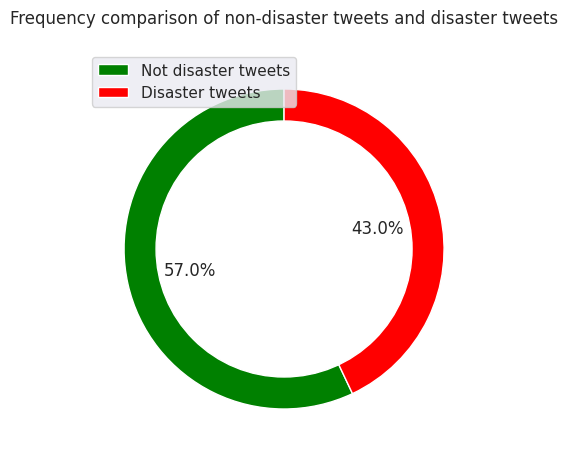

In [ ]:
# Visualization of class frequencies
target_frequency = np.array([len(data_train_0), len(data_train_1)])
target_label = ["Not disaster tweets", "Disaster tweets"]
target_color = ["green", "red"]
donutplot(value = target_frequency, label = target_label, color = target_color, title = "Frequency comparison of non-disaster tweets and disaster tweets")

#Keyword

In [ ]:
# Handling of NaN values in 'keyword' column at the start
keyword = list(data_train["keyword"])
nan_type_conv(keyword)

# Extract unique keywords once
keyword_unique = unique(keyword)

# Create a dictionary to store keyword counts for better efficiency
keyword_counts = {word: word_counter(word, keyword) for word in keyword_unique}

# Split data and process NaN values for each class
keyword_0 = list(data_train_0["keyword"])
nan_type_conv(keyword_0)
keyword_1 = list(data_train_1["keyword"])
nan_type_conv(keyword_1)

# Compute counts using dictionary lookup instead of redundant function calls
keyword_0_counts = {word: word_counter(word, keyword_0) for word in keyword_unique}
keyword_1_counts = {word: word_counter(word, keyword_1) for word in keyword_unique}

# Create dataframe
keyword_df = pd.DataFrame({
    "keyword": keyword_unique,
    "count (all tweets)": [keyword_counts[word] for word in keyword_unique],
    "proportion (all tweets)": [keyword_counts[word] / len(keyword) for word in keyword_unique],
    "count (non-disaster tweets)": [keyword_0_counts[word] for word in keyword_unique],
    "proportion (non-disaster tweets)": [keyword_0_counts[word] / len(keyword_0) for word in keyword_unique],
    "count (disaster tweets)": [keyword_1_counts[word] for word in keyword_unique],
    "proportion (disaster tweets)": [keyword_1_counts[word] / len(keyword_1) for word in keyword_unique],
})

# Compute absolute difference separately for clarity
keyword_df["absolute difference"] = abs(keyword_df["proportion (disaster tweets)"] - keyword_df["proportion (non-disaster tweets)"])


In [ ]:
print(keyword_df[['keyword', 'count (all tweets)']].to_string())

                   keyword  count (all tweets)
0                      NaN                  61
1                   ablaze                  36
2                 accident                  35
3               aftershock                  34
4      airplane%20accident                  35
5                ambulance                  38
6              annihilated                  34
7             annihilation                  29
8               apocalypse                  32
9               armageddon                  42
10                    army                  34
11                   arson                  32
12                arsonist                  34
13                  attack                  36
14                attacked                  35
15               avalanche                  30
16                  battle                  26
17               bioterror                  37
18            bioterrorism                  30
19                   blaze                  38
20           

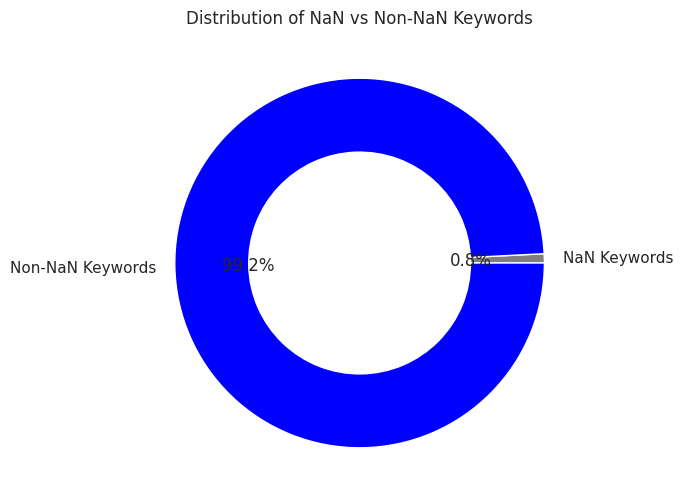

In [ ]:
import matplotlib.pyplot as plt

# Count NaN and non-NaN keyword frequencies
nan_keyword_count = sum(pd.isna(data_train["keyword"]))  # Count NaN values
non_nan_keyword_count = len(data_train) - nan_keyword_count  # Count non-NaN values

# Define values and labels
values = [nan_keyword_count, non_nan_keyword_count]
labels = ["NaN Keywords", "Non-NaN Keywords"]
colors = ["gray", "blue"]

# Create a Donut Plot
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, wedgeprops=dict(width=0.4))
plt.title("Distribution of NaN vs Non-NaN Keywords")
plt.show()


In [ ]:
# Classwise keyword-count
keyword_df_count = keyword_df[["keyword", "count (all tweets)", "count (non-disaster tweets)", "count (disaster tweets)"]].sort_values(by = ["count (all tweets)"], ascending = False)
keyword_df_count.dropna(subset=["keyword"], inplace=True) # deleting the rows with keyword NaN



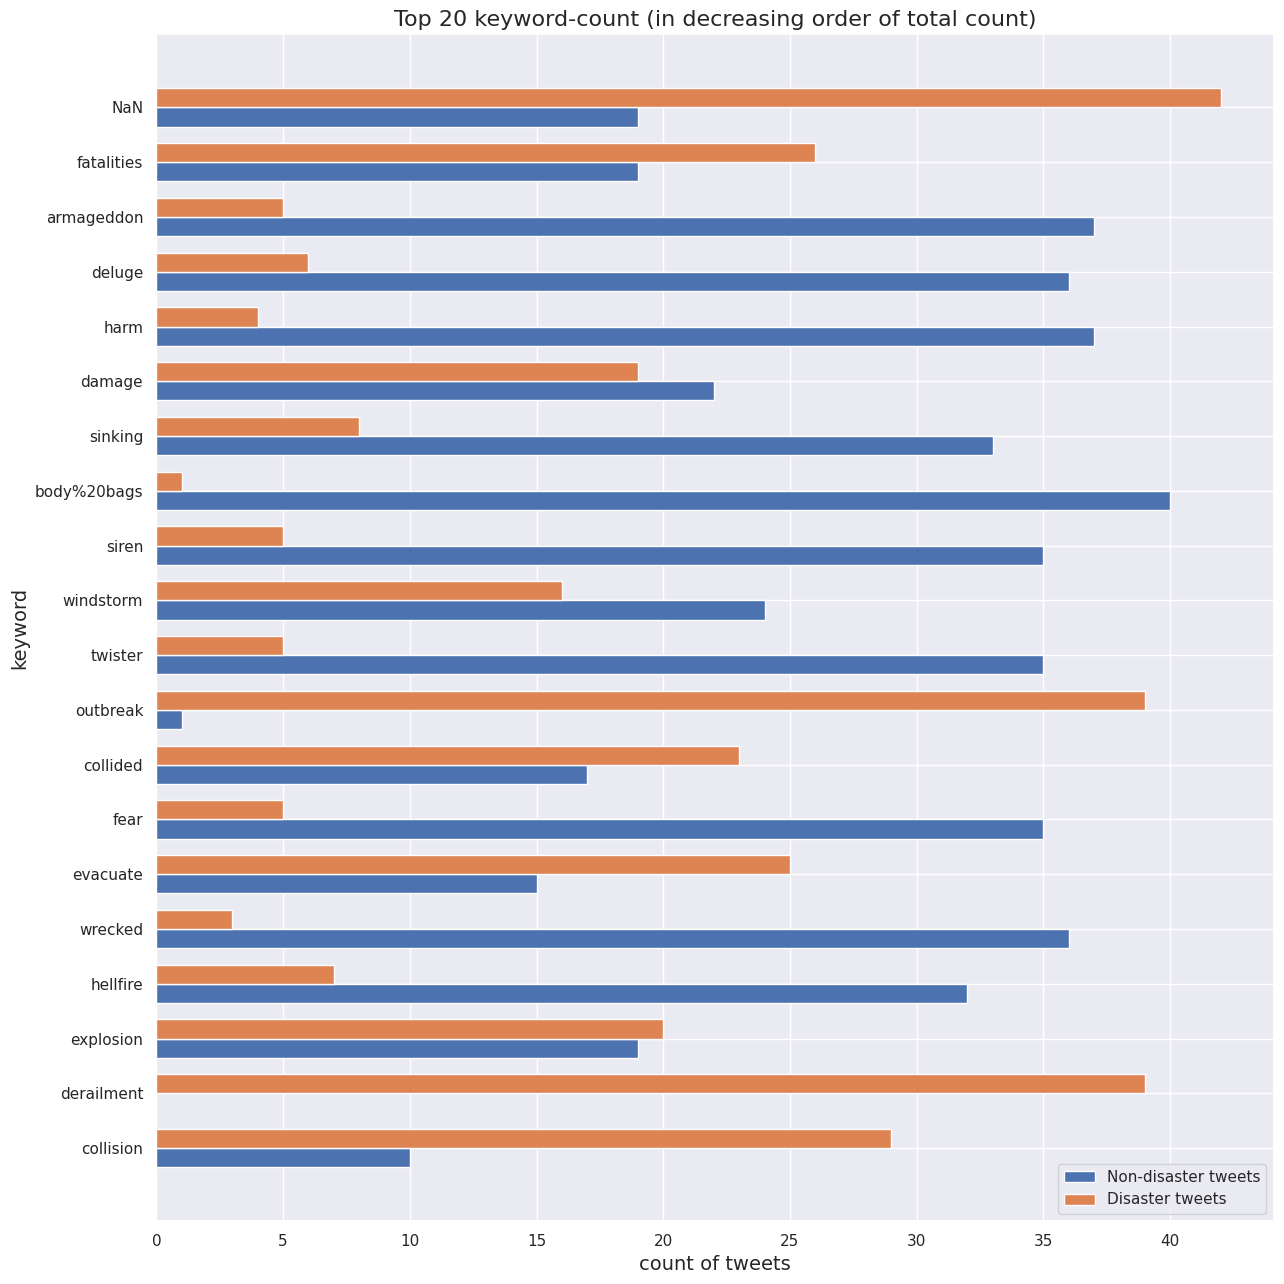

In [ ]:
classwise_comparison_barplot(df = keyword_df_count,
                             n = 20,
                             feature = "keyword",
                             non_disaster = "count (non-disaster tweets)",
                             disaster = "count (disaster tweets)",
                             xlabel = "count of tweets",
                             ylabel = "keyword",
                             title = "Top 20 keyword-count (in decreasing order of total count)"
                            )

Since the number of non-disaster and disaster tweets is unequal, we can’t directly compare the raw counts of a keyword in both categories. A keyword might appear more in non-disaster tweets simply because there are more of them, not because the keyword is more relevant.

To make a fair comparison, we calculate the proportion of a keyword in each class by dividing its count by the total tweets in that class.

The absolute difference between these proportions tells us how well a keyword helps differentiate between disaster and non-disaster tweets.

If the difference is close to 0 → The keyword appears equally in both types of tweets, so it doesn’t help in classification.

If the difference is large → The keyword is much more common in one category, making it a strong indicator of that type of tweet.

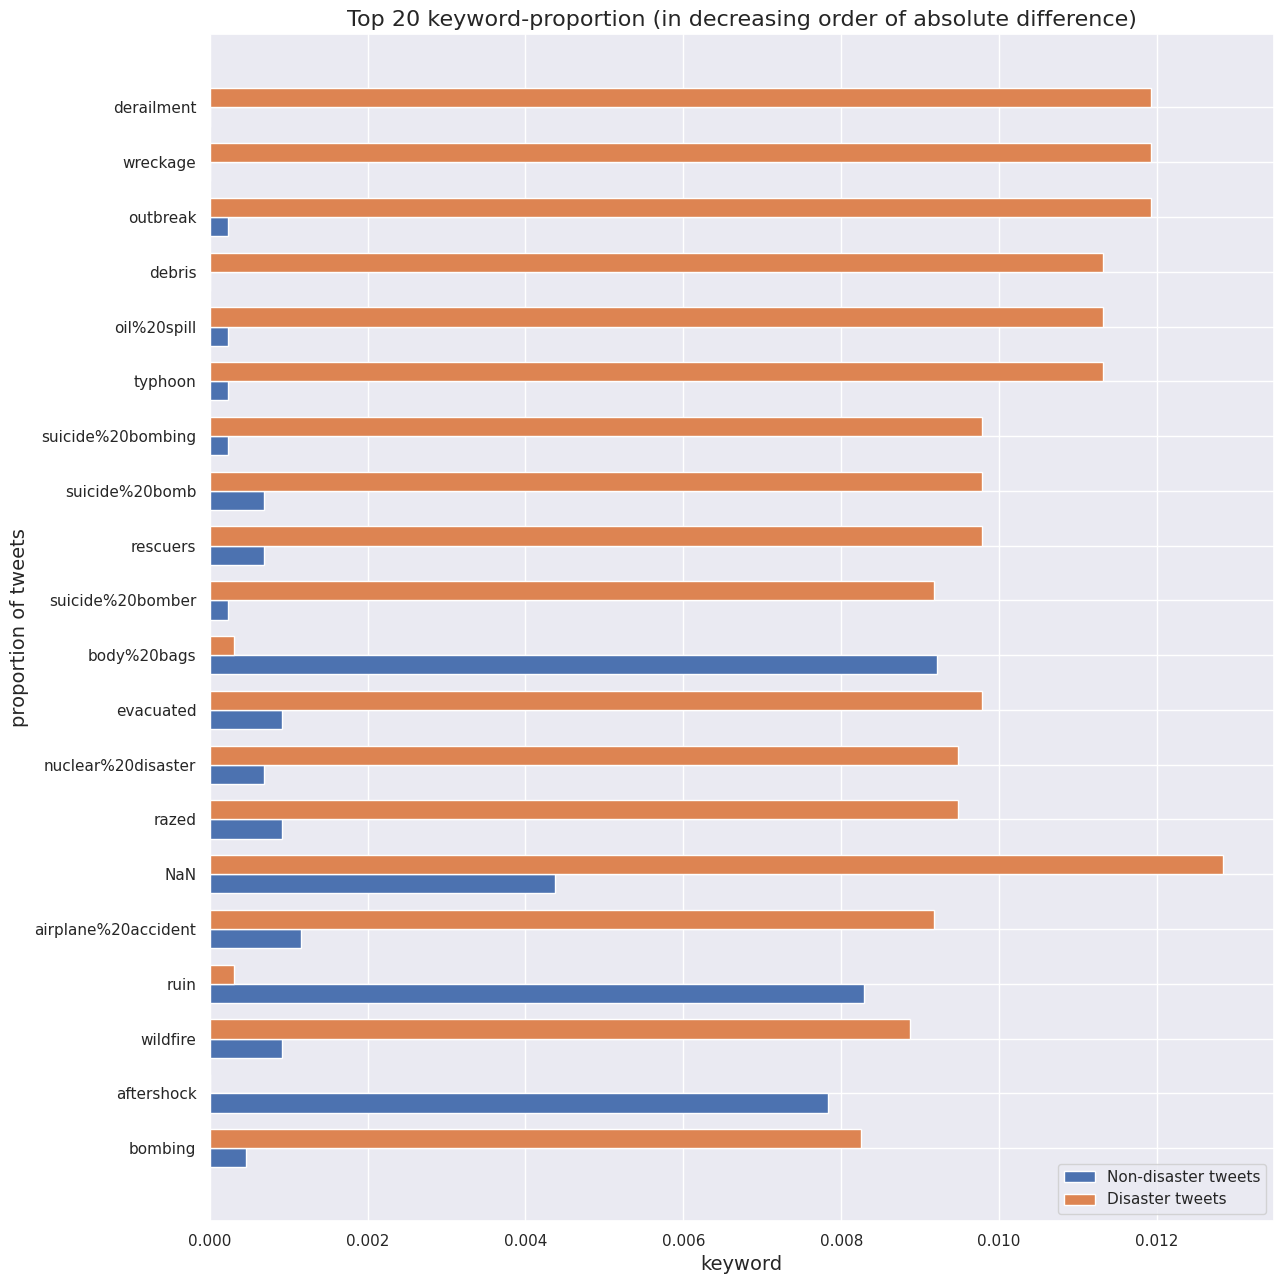

In [ ]:
# Classwise keyword-proportion
keyword_df_proportion = keyword_df[["keyword", "proportion (non-disaster tweets)", "proportion (disaster tweets)", "absolute difference"]].sort_values(by = ["absolute difference"], ascending = False)
keyword_df_count.dropna(subset=["keyword"], inplace=True)  # deleting the rows with keyword NaN


classwise_comparison_barplot(df = keyword_df_proportion,
                             n = 20,
                             feature = "keyword",
                             non_disaster = "proportion (non-disaster tweets)",
                             disaster = "proportion (disaster tweets)",
                             xlabel = "keyword",
                             ylabel = "proportion of tweets",
                             title = "Top 20 keyword-proportion (in decreasing order of absolute difference)"
                            )

In [ ]:
# 5 keywords with least absolute difference between proportion in non-disaster tweets and proportion in disaster tweets
keyword_df_proportion["keyword"].tail(5).values.tolist()

['collapse', 'weapons', 'landslide', 'disaster', 'flood']

#Observation:
The five keywords with the smallest difference in their proportions between non-disaster and disaster tweets are: "bomb," "weapons," "landslide," "flood," and "disaster."

Interestingly, these words are typically linked to disasters. However, they also appear in non-disaster contexts. For example:

"Landslide" can refer to a political victory rather than a natural disaster.

"Flood" might describe a flood of emotions rather than an actual flood.

Even though these words are used in different ways, it's surprising that they show up so frequently in non-disaster tweets, making it harder to use them as clear indicators of disaster-related content.

#Location Analysis
We first look at how many tweets have missing location information by visualizing the proportion of NaN values. Then, we explore the most common locations mentioned in tweets, both in terms of total count and frequency per tweet, for both disaster-related and non-disaster tweets. This helps us understand whether location plays a significant role in distinguishing between the two categories

In [ ]:
# Location - main dataframe
location = list(data_train["location"])
nan_type_conv(location)
location_unique = unique(location)
location_unique_count = [word_counter(word, location) for word in location_unique]

location_0 = list(data_train_0["location"])
nan_type_conv(location_0)
location_0_unique_count = [word_counter(word, location_0) for word in location_unique]

location_1 = list(data_train_1["location"])
nan_type_conv(location_1)
location_1_unique_count = [word_counter(word, location_1) for word in location_unique]

location_df = pd.DataFrame()
location_df["location"] = location_unique
location_df["count (all tweets)"] = location_unique_count
location_df["proportion (all tweets)"] = [count/len(location) for count in location_unique_count]
location_df["count (non-disaster tweets)"] = location_0_unique_count
location_df["proportion (non-disaster tweets)"] = [count/len(location_0) for count in location_0_unique_count]
location_df["count (disaster tweets)"] = location_1_unique_count
location_df["proportion (disaster tweets)"] = [count/len(location_1) for count in location_1_unique_count]
location_df["absolute difference"] = abs(location_df["proportion (disaster tweets)"] - location_df["proportion (non-disaster tweets)"])


In [ ]:
print(location_df[['location', 'count (all tweets)']].to_string())

                                               location  count (all tweets)
0                                                   NaN                2533
1                                            Birmingham                   4
2                         Est. September 2012 - Bristol                   1
3                                                AFRICA                   1
4                                      Philadelphia, PA                   4
5                                            London, UK                  10
6                                              Pretoria                   2
7                                          World Wide!!                   1
8                                        Paranaque City                   1
9                                        Live On Webcam                   2
10                                            milky way                   1
11                            GREENSBORO,NORTH CAROLINA                   1
12          

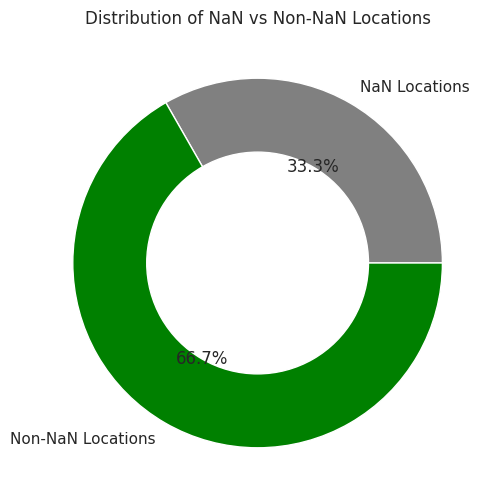

In [ ]:
import matplotlib.pyplot as plt

# Count NaN and non-NaN location frequencies
nan_location_count = sum(pd.isna(data_train["location"]))  # Count NaN values
non_nan_location_count = len(data_train) - nan_location_count  # Count non-NaN values

# Define values and labels
values = [nan_location_count, non_nan_location_count]
labels = ["NaN Locations", "Non-NaN Locations"]
colors = ["gray", "green"]

# Create a Donut Plot
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=colors, wedgeprops=dict(width=0.4))
plt.title("Distribution of NaN vs Non-NaN Locations")
plt.show()


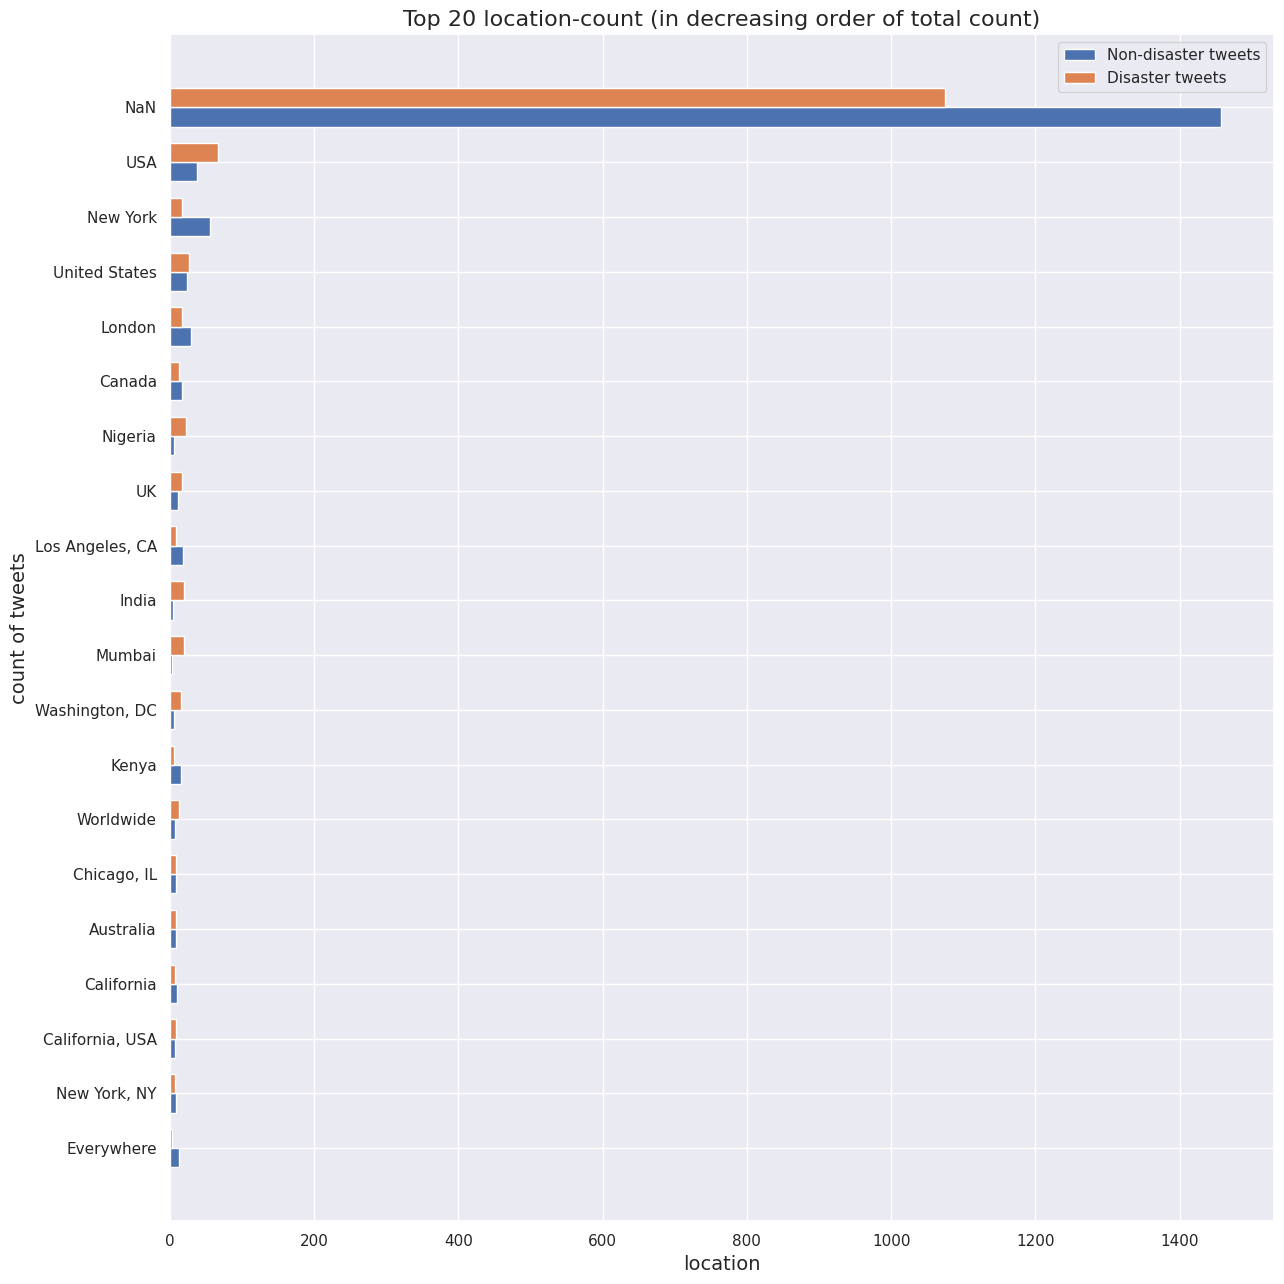

In [ ]:
# Classwise location-count
location_df_count = location_df[["location", "count (all tweets)", "count (non-disaster tweets)", "count (disaster tweets)"]].sort_values(by = ["count (all tweets)"], ascending = False)
location_df_count.dropna(subset=["location"], inplace=True) # deleting the rows with location NaN

classwise_comparison_barplot(df = location_df_count,
                             n = 20,
                             feature = "location",
                             non_disaster = "count (non-disaster tweets)",
                             disaster = "count (disaster tweets)",
                             xlabel = "location",
                             ylabel = "count of tweets",
                             title = "Top 20 location-count (in decreasing order of total count)"
                            )

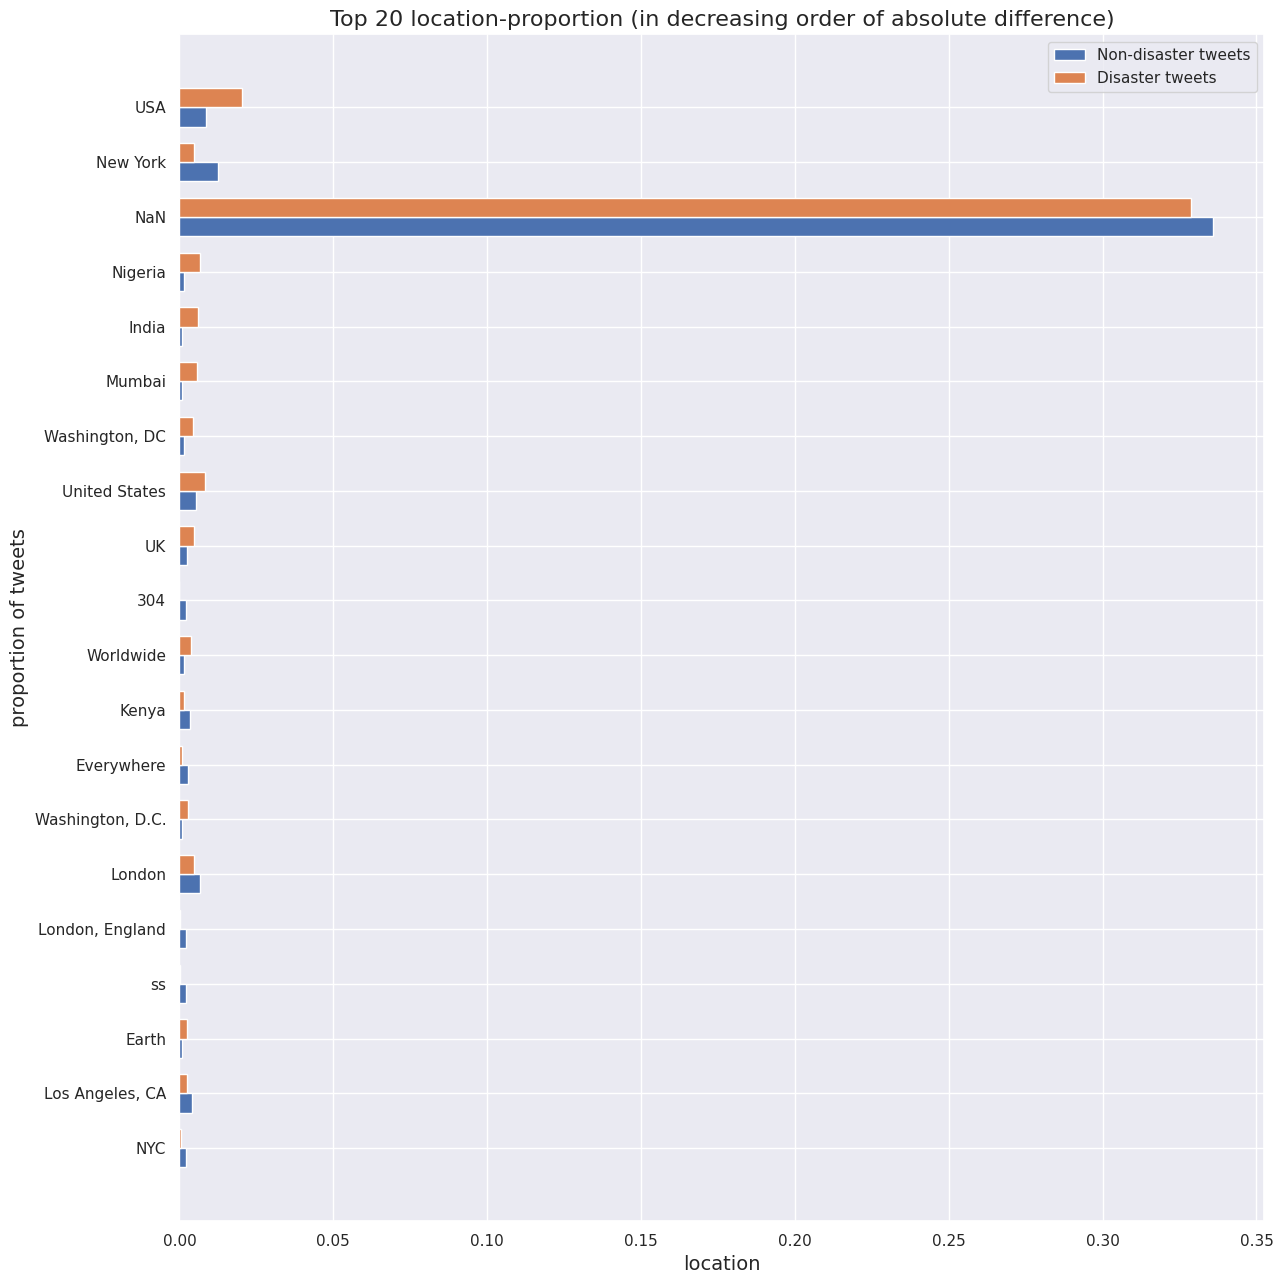

In [ ]:
# Classwise location-proportion
location_df_proportion = location_df[["location", "proportion (non-disaster tweets)", "proportion (disaster tweets)", "absolute difference"]].sort_values(by = ["absolute difference"], ascending = False)
location_df_proportion.dropna(subset=["location"], inplace=True) # deleting the rows with location NaN

classwise_comparison_barplot(df = location_df_proportion,
                             n = 20,
                             feature = "location",
                             non_disaster = "proportion (non-disaster tweets)",
                             disaster = "proportion (disaster tweets)",
                             xlabel = "location",
                             ylabel = "proportion of tweets",
                             title = "Top 20 location-proportion (in decreasing order of absolute difference)"
                            )

### Note:
In most of our visualizations, such as the class-wise comparison of **keywords** and **locations**, we do not display all the unique values. This is because these features contain a **large number of distinct textual values**, making it difficult to visualize them effectively.

To keep the analysis clear and meaningful, we **select only a few important observations** based on specific attributes, such as the total count. For instance:
- The **top keywords** are chosen based on how frequently they appear in tweets.
- The **most common locations** are selected based on their occurrence in the dataset.

This approach helps us focus on the most relevant patterns, making the visualizations more **insightful and easy to interpret**.


#Number of Characters  
We analyze how the number of characters in a tweet varies for both **non-disaster** and **disaster** tweets. By examining this distribution, we can observe whether tweets related to disasters tend to be longer or shorter compared to non-disaster tweets.


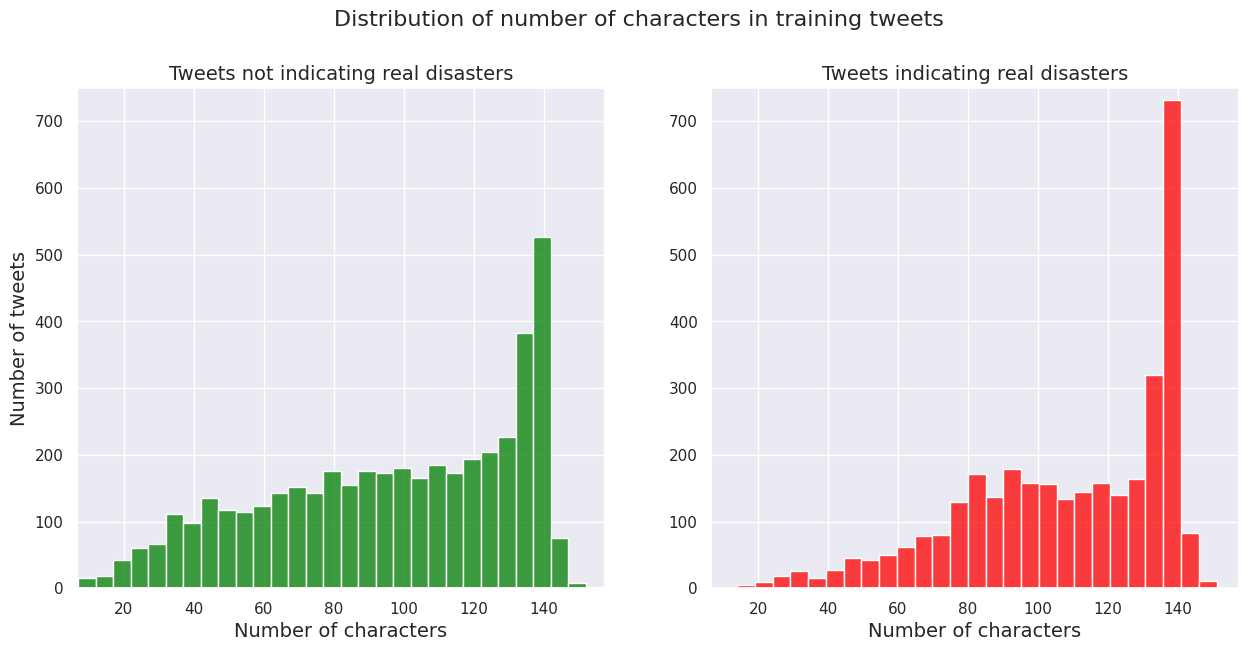

In [ ]:
# Function to visualise classwise comparison of feature distribution - histograms in two separate subplots
def classwise_comparison_subplot(feature_train_0, feature_train_1, binwidth, title_0, title_1, ylimit, xlabel, ylabel, suptitle):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6.5))

    xmin = np.min([feature_train_0.min(), feature_train_1.min()])
    xmax = np.max([feature_train_0.max(), feature_train_1.max()])

    sns.histplot(feature_train_0, ax = ax1, color = "green", binwidth = binwidth)
    ax1.set_title(title_0, fontsize = 14)
    ax1.set_xlim([xmin - 0.5, xmax + 0.5])
    ax1.set_ylim([0, ylimit])
    ax1.set_xlabel(xlabel, fontsize = 14)
    ax1.set_ylabel(ylabel, fontsize = 14)

    sns.histplot(feature_train_1, ax = ax2, color = "red", binwidth = binwidth)
    ax2.set_title(title_1, fontsize = 14)
    ax2.set_xlim([xmin - 0.5, xmax + 0.5])
    ax2.set_ylim([0, ylimit])
    ax2.set_xlabel(xlabel, fontsize = 14)
    ax2.set_ylabel("")

    fig.suptitle(suptitle, y = 1.0, fontsize = 16)
    plt.show()
    # Distribution of number of characters in tweets
data_train_0_char = data_train_0['text'].str.len()
data_train_1_char = data_train_1['text'].str.len()

classwise_comparison_subplot(feature_train_0 = data_train_0_char,
                             feature_train_1 = data_train_1_char,
                             binwidth = 5,
                             title_0 = "Tweets not indicating real disasters",
                             title_1 = "Tweets indicating real disasters",
                             ylimit = 750,
                             xlabel = "Number of characters",
                             ylabel = "Number of tweets",
                             suptitle = "Distribution of number of characters in training tweets"
                            )

#Number of Words  
We analyze the distribution of the number of words in each tweet for both **non-disaster tweets** and **disaster tweets**.  
This helps us understand whether disaster-related tweets tend to have more or fewer words compared to non-disaster tweets.  


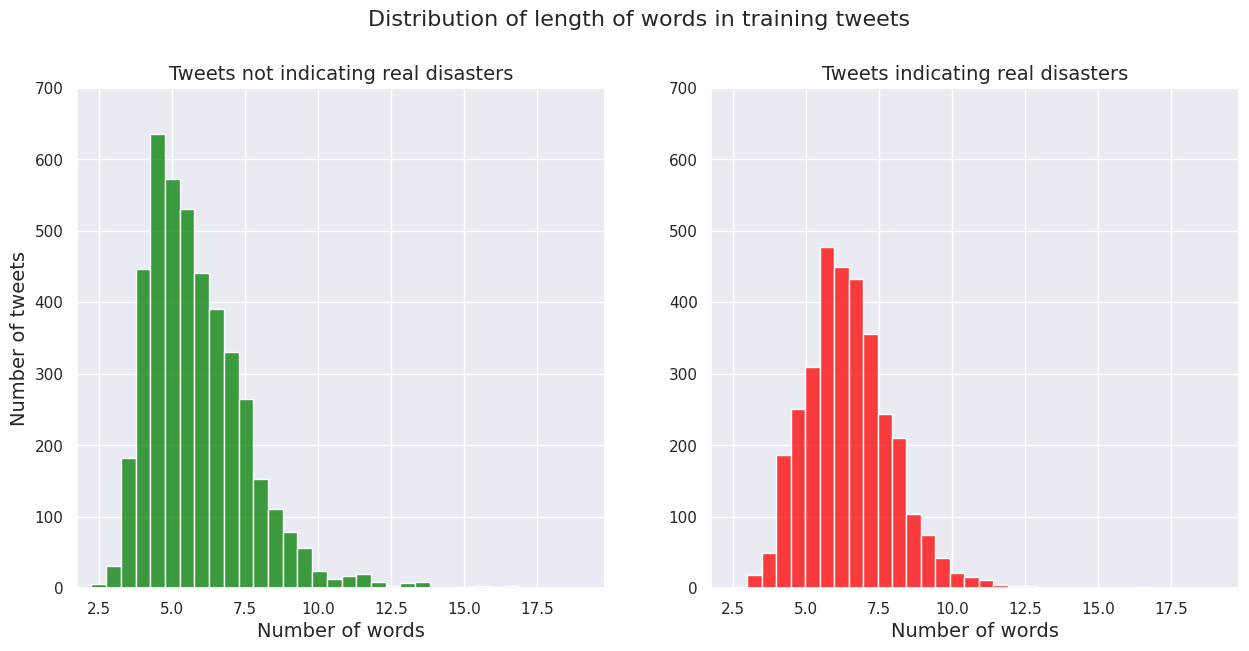

In [ ]:
# Distribution of average word-length in tweets
data_train_0_avg = data_train_0["text"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
data_train_1_avg = data_train_1["text"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

classwise_comparison_subplot(feature_train_0 = data_train_0_avg,
                             feature_train_1 = data_train_1_avg,
                             binwidth = 0.5,
                             title_0 = "Tweets not indicating real disasters",
                             title_1 = "Tweets indicating real disasters",
                             ylimit = 700,
                             xlabel = "Number of words",
                             ylabel = "Number of tweets",
                             suptitle = "Distribution of length of words in training tweets"
                            )

## URLs in Tweets  

We analyze how many URLs appear in tweets and compare the distribution for **non-disaster tweets** and **disaster tweets**. This helps in understanding whether tweets indicating real disasters contain more or fewer links compared to general tweets.  

### Why is this important?  
- Identifies if disaster-related tweets frequently contain external links (e.g., news articles).  
- Helps in feature engineering for machine learning models.  
- Provides insights into how people share disaster-related information (e.g., personal experiences vs. news sources).  


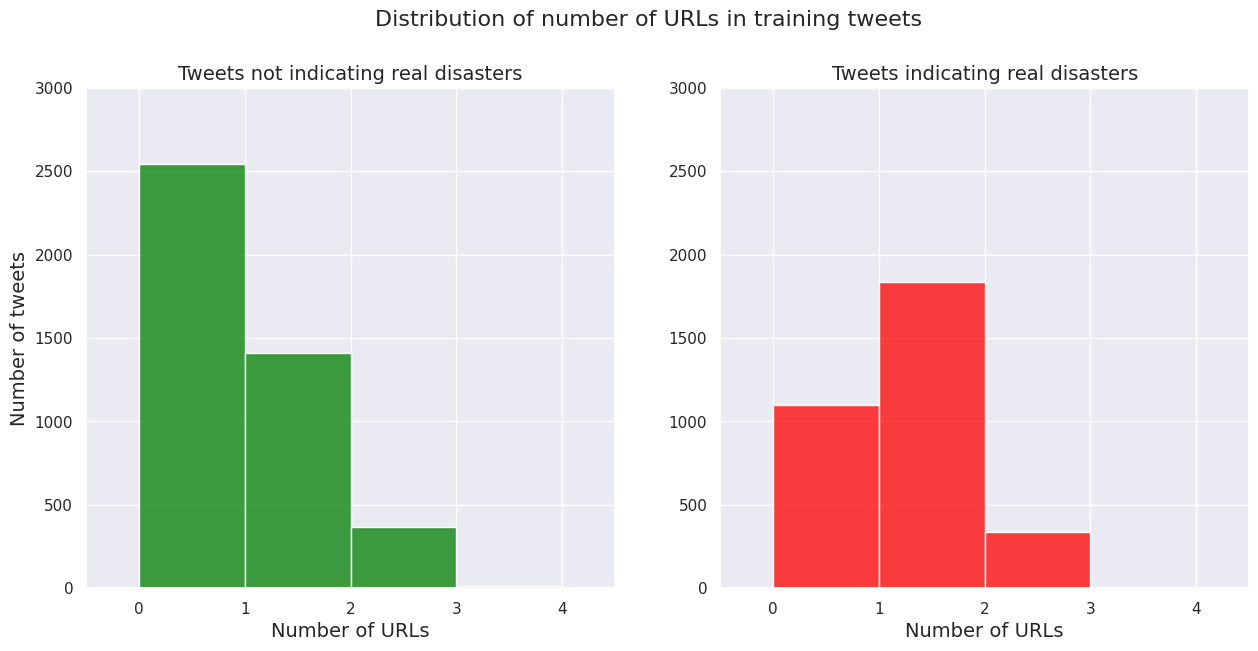

In [ ]:
# Distribution of number of urls in tweets
url_train_0_count = data_train_0["text"].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
url_train_1_count = data_train_1["text"].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

classwise_comparison_subplot(feature_train_0 = url_train_0_count,
                             feature_train_1 = url_train_1_count,
                             binwidth = 1,
                             title_0 = "Tweets not indicating real disasters",
                             title_1 = "Tweets indicating real disasters",
                             ylimit = 3000,
                             xlabel = "Number of URLs",
                             ylabel = "Number of tweets",
                             suptitle = "Distribution of number of URLs in training tweets"
                            )

## Hashtags (#) in Tweets  

We analyze the number of hashtags used in tweets and compare the distribution between **non-disaster tweets** and **disaster tweets**.  

### Why is this important?  
- Helps determine if disaster-related tweets use more hashtags for awareness and visibility.  
- Assists in identifying patterns in hashtag usage for disaster-related communication.  
- Useful for feature selection in tweet classification models.  


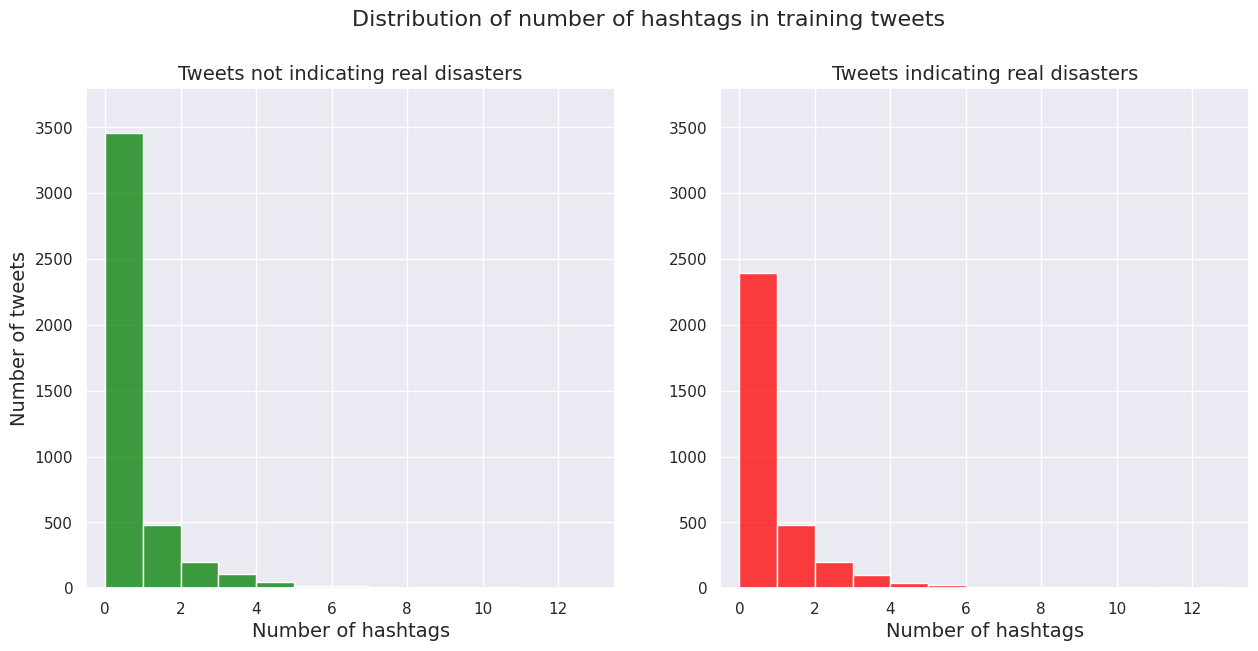

In [ ]:
# Distribution of number of hashtags in tweets
hashtag_train_0_count = data_train_0["text"].apply(lambda x: len([c for c in str(x) if c == '#']))
hashtag_train_1_count = data_train_1["text"].apply(lambda x: len([c for c in str(x) if c == '#']))

classwise_comparison_subplot(feature_train_0 = hashtag_train_0_count,
                             feature_train_1 = hashtag_train_1_count,
                             binwidth = 1,
                             title_0 = "Tweets not indicating real disasters",
                             title_1 = "Tweets indicating real disasters",
                             ylimit = 3800,
                             xlabel = "Number of hashtags",
                             ylabel = "Number of tweets",
                             suptitle = "Distribution of number of hashtags in training tweets"
                            )

## Mentions (@) in Tweets

We analyze the distribution of the number of mentions (`@username`) per tweet for both **non-disaster** and **disaster** tweets. This helps us understand how mentions are used in different tweet categories and whether they play a role in distinguishing disaster-related tweets.


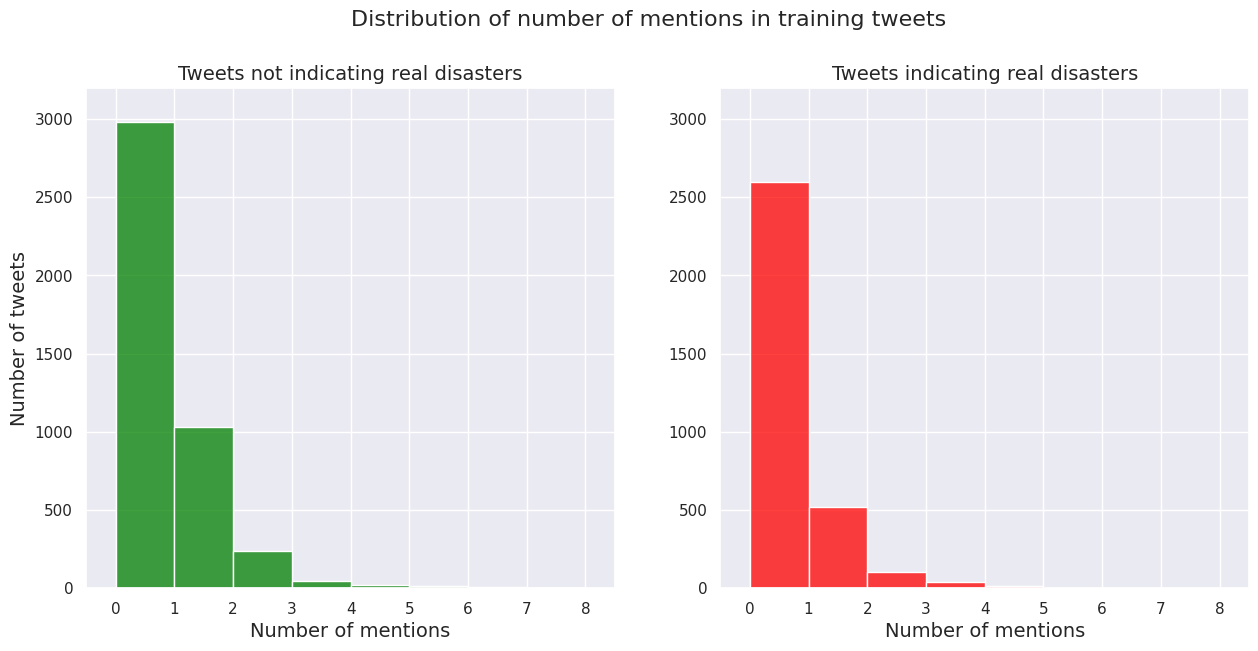

In [ ]:
# Distribution of number of mentions in tweets
mention_train_0_count = data_train_0["text"].apply(lambda x: len([c for c in str(x) if c == '@']))
mention_train_1_count = data_train_1["text"].apply(lambda x: len([c for c in str(x) if c == '@']))

classwise_comparison_subplot(feature_train_0 = mention_train_0_count,
                             feature_train_1 = mention_train_1_count,
                             binwidth = 1,
                             title_0 = "Tweets not indicating real disasters",
                             title_1 = "Tweets indicating real disasters",
                             ylimit = 3200,
                             xlabel = "Number of mentions",
                             ylabel = "Number of tweets",
                             suptitle = "Distribution of number of mentions in training tweets"
                            )

## Punctuations in Tweets

We analyze the most frequently used punctuations in tweets, considering both **total count** and **count per tweet** for **non-disaster** and **disaster** tweets. This helps identify patterns in punctuation usage across different tweet categories.


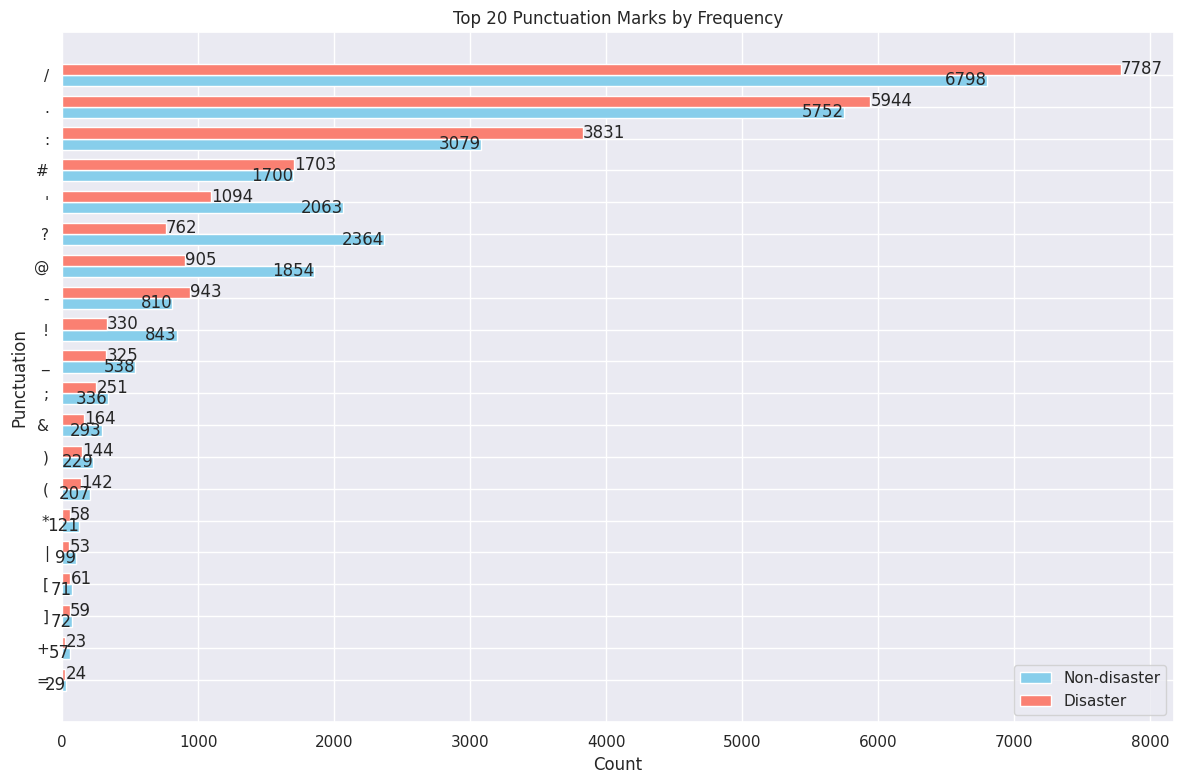

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Function to extract punctuation from text
def get_punctuation(text):
    return [char for char in text if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']

# Get all punctuation marks
punct_train_0 = [p for text in data_train_0['text'] for p in get_punctuation(text)]
punct_train_1 = [p for text in data_train_1['text'] for p in get_punctuation(text)]

# Get unique punctuation marks
all_punctuation = punct_train_0 + punct_train_1
unique_punct = list(set(all_punctuation))

# Count punctuation for each class
count_non_disaster = [punct_train_0.count(p) for p in unique_punct]
count_disaster = [punct_train_1.count(p) for p in unique_punct]

# Create DataFrame
punct_count = pd.DataFrame({
    'punctuation': unique_punct,
    'count (non-disaster tweets)': count_non_disaster,
    'count (disaster tweets)': count_disaster
})

# Calculate total counts and sort
punct_count['count (all tweets)'] = punct_count['count (non-disaster tweets)'] + punct_count['count (disaster tweets)']
punct_count.sort_values('count (all tweets)', ascending=False, inplace=True)

# Plot the top 20
plt.figure(figsize=(12, 8))
top_n = min(20, len(punct_count))
df_top = punct_count.head(top_n).iloc[::-1]

y_pos = np.arange(len(df_top))
bar_width = 0.35

plt.barh(y_pos - bar_width/2, df_top['count (non-disaster tweets)'],
         height=bar_width, color='skyblue', label='Non-disaster')
plt.barh(y_pos + bar_width/2, df_top['count (disaster tweets)'],
         height=bar_width, color='salmon', label='Disaster')

plt.yticks(y_pos, df_top['punctuation'])
plt.xlabel('Count')
plt.ylabel('Punctuation')
plt.title('Top 20 Punctuation Marks by Frequency')
plt.legend()

# Add value labels
for i, (val_nd, val_d) in enumerate(zip(df_top['count (non-disaster tweets)'],
                                      df_top['count (disaster tweets)'])):
    plt.text(val_nd, i - bar_width/2, f"{val_nd}", ha='right', va='center')
    plt.text(val_d, i + bar_width/2, f"{val_d}", ha='left', va='center')

plt.tight_layout()
plt.show()

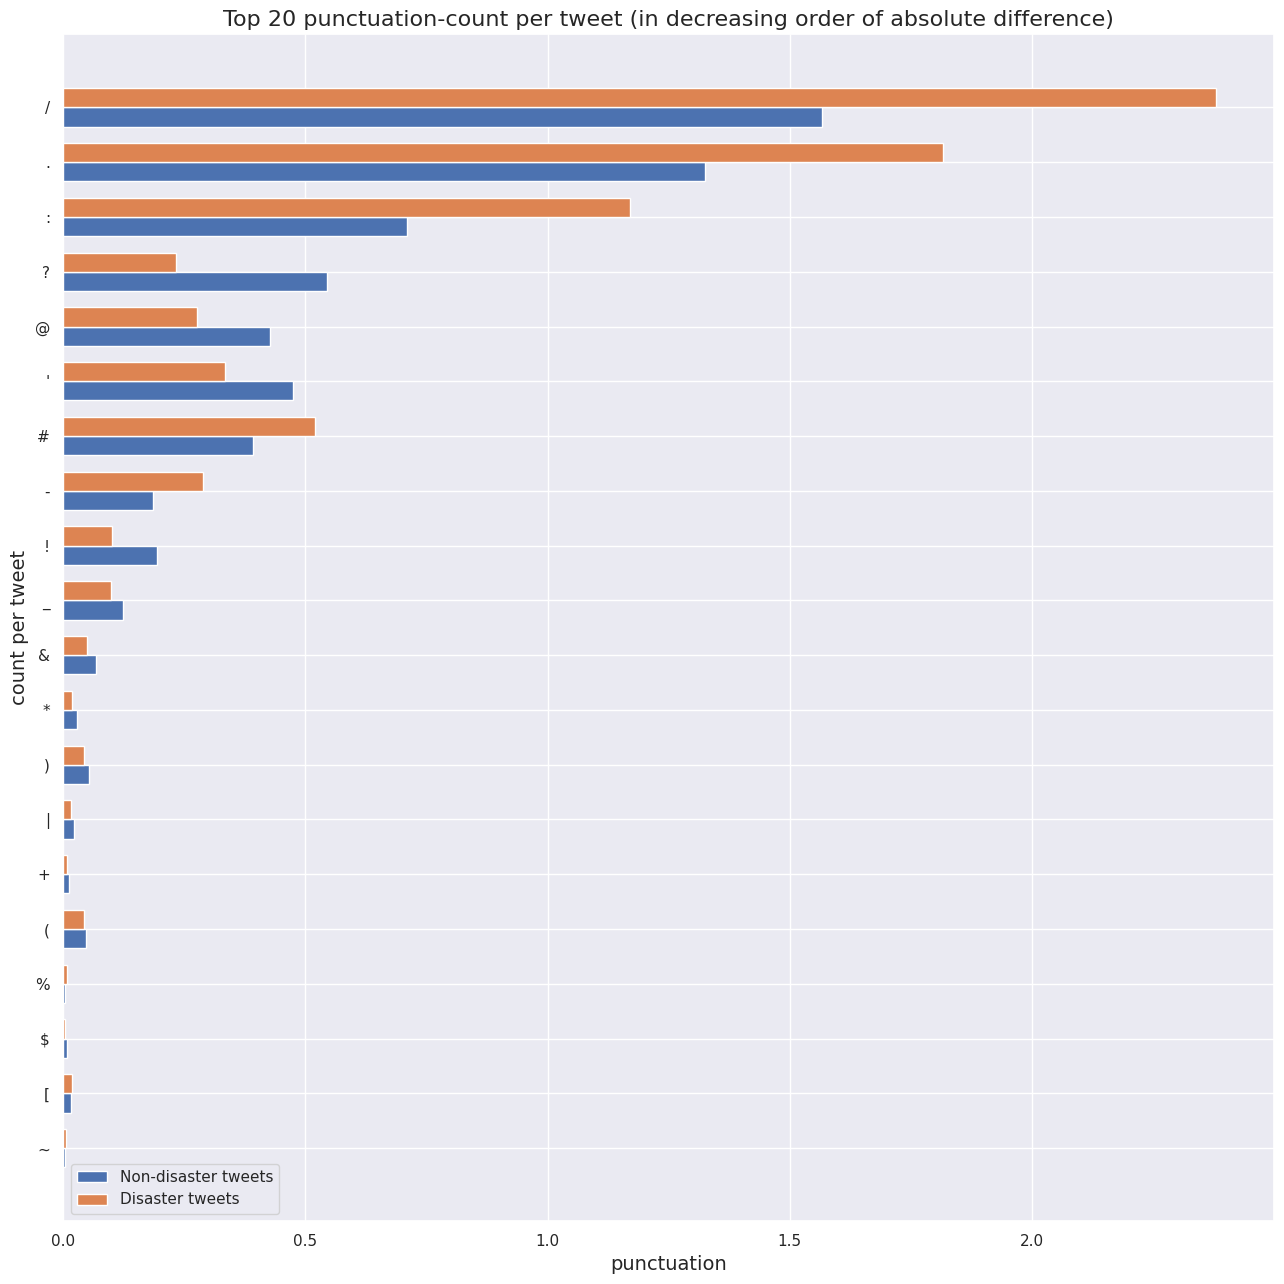

In [ ]:
# Classwise punctuation-count per tweet
punct_count_per_non_disaster_tweet = [word_counter(punct, punct_train_0)/len(data_train_0) for punct in unique_punct]
punct_count_per_disaster_tweet = [word_counter(punct, punct_train_1)/len(data_train_1) for punct in unique_punct]

punct_count_per_tweet = pd.DataFrame()
punct_count_per_tweet["punctuation"] = unique_punct
punct_count_per_tweet["count per non-disaster tweet"] = punct_count_per_non_disaster_tweet
punct_count_per_tweet["count per disaster tweet"] = punct_count_per_disaster_tweet
punct_count_per_tweet["absolute difference"] = abs(punct_count_per_tweet["count per non-disaster tweet"] - punct_count_per_tweet["count per disaster tweet"])
punct_count_per_tweet.sort_values(by = ["absolute difference", "count per disaster tweet", "count per non-disaster tweet"], ascending = False, inplace = True)

classwise_comparison_barplot(df = punct_count_per_tweet,
                             n = 20,
                             feature = "punctuation",
                             non_disaster = "count per non-disaster tweet",
                             disaster = "count per disaster tweet",
                             xlabel = "punctuation",
                             ylabel = "count per tweet",
                             title = "Top 20 punctuation-count per tweet (in decreasing order of absolute difference)"
                            )

## Text Normalization

We apply several text normalization techniques to preprocess the tweets. These techniques include:

- **Conversion to lowercase** – Standardizes text by making all characters lowercase.
- **Removal of whitespaces** – Eliminates unnecessary spaces for consistency.
- **Removal of punctuations** – Strips punctuation marks to focus on the core text.
- **Removal of Unicode characters** – Filters out HTML tags, emojis, and URLs (e.g., links starting with `http`).
- **Substitution of acronyms** – Expands common abbreviations to their full forms.
- **Substitution of contractions** – Converts shortened words (e.g., "can't" → "cannot").
- **Removal of stop words** – Eliminates common words like "the," "is," and "in" that add little meaning.
- **Spelling correction** – Fixes common spelling errors.
- **Stemming** – Reduces words to their root form (e.g., "running" → "run").
- **Lemmatization** – Converts words to their dictionary base form.
- **Discardment of non-alphabetic words** – Removes numbers and special characters.
- **Retention of relevant parts of speech (POS)** – Keeps only the most meaningful words based on their grammatical roles.

At the end of this section, we consolidate all these processes into a single function and apply it to the training tweets.


## Conversion to Lowercase  

We convert all text to lowercase to avoid treating the same word differently due to capitalization.  

For example, **"Disaster"** and **"disaster"** should be considered the same word.  


In [ ]:
 #Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a CONVESRION to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a CONVESRION to lowercase
Output: this is a convesrion to lowercase


## Removal of Whitespaces  
We remove unnecessary spaces from tweets to ensure clean and consistent text formatting.


In [ ]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \tI am Ali Usama \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	I am Ali Usama 	 
Output: I am Ali Usama


# Removal of Punctuations  

Most punctuation marks do not help in determining whether a tweet indicates a disaster or not. Therefore, we remove them to avoid unnecessary noise in the classification process.  

However, we **retain apostrophes** since they are essential for contractions (e.g., "don't" or "it's"), which will be handled separately during the contraction conversion process.


In [ ]:
# Importing required module
import string

# Function to remove punctuation
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")  # Keeping apostrophes intact
    return text.translate(str.maketrans("", "", punct_str))

# Example usage
text = "Wow!!! This, right here, is *amazing*... Don't you think?"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))


Input: Wow!!! This, right here, is *amazing*... Don't you think?
Output: Wow This right here is amazing Don't you think


#Removal of Unicode Characters
Tweets often contain emojis, URLs, and symbols that add noise to our analysis. We remove these irrelevant characters using regular expressions.









In [ ]:
# Removing HTML tags
import re

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.kaggle.com/c/nlp-getting-started/overview"> Natural Language Processing with Disaster Tweets </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/c/nlp-getting-started/overview"> Natural Language Processing with Disaster Tweets </a>
Output:  Natural Language Processing with Disaster Tweets 


In [ ]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "Excited for the weekend! 🎉😃 #FunTime"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))


Input: Excited for the weekend! 🎉😃 #FunTime
Output: Excited for the weekend!  #FunTime


In [ ]:
# Removing URLs

def remove_http(text):
    http = r"https?://\S+|www\.\S+"  # Matches URLs starting with http, https, or www
    pattern = r"({})".format(http)  # Creating pattern
    return re.sub(pattern, "", text)

text = "Visit my blog at https://myblog.com or check www.example.com for updates!"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))


Input: Visit my blog at https://myblog.com or check www.example.com for updates!
Output: Visit my blog at  or check  for updates!


#Substituting Acronyms
Acronyms are shortened forms of phrases commonly used in informal writing, like fyi (for your information) and btw (by the way).

In [ ]:
# Load dictionary of acronyms from local file
import pandas as pd

acronyms_dict = pd.read_json("/content/english_acronyms_lowercase.json", typ='series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict.get("fyi", "Not found")))

Example: Original form of the acronym 'fyi' is 'for your information'


In [ ]:
# Convert dictionary to DataFrame
acronyms_df = acronyms_dict.reset_index()
acronyms_df.columns = ["Acronym", "Original Form"]

# Display the first few rows
print(acronyms_df.head())

  Acronym        Original Form
0     aka        also known as
1    asap  as soon as possible
2     brb        be right back
3     btw           by the way
4     dob        date of birth


In [ ]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [ ]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import nltk
from nltk.tokenize import regexp_tokenize

# Function to convert acronyms in a text
def convert_acronyms(text):
    words = []
    for word in regexp_tokenize(text, pattern=r'\S+'):  # Fixed the missing pattern
        if word in acronyms_list:
            words += acronyms_dict[word].split()
        else:
            words.append(word)

    text_converted = " ".join(words)
    return text_converted

# Example usage
text = "asap you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))


Input: asap you've to fill in the details including dob
Output: as soon as possible you've to fill in the details including date of birth


#Contractions
Contractions are shortened forms of words or phrases created by omitting letters, often replaced by an apostrophe.

Examples:

I'm → I am

let's → let us

won't → will not

howdy → how do you do

In [ ]:
# Load the contractions dictionary from the file
import pandas as pd
import re
from nltk.tokenize import word_tokenize

# Load contractions dictionary
contractions_path = "/content/english_contractions_lowercase.json"
contractions_dict = pd.read_json(contractions_path, typ="series")



# Convert dictionary to DataFrame and display head
contractions_df = contractions_dict.reset_index()
contractions_df.columns = ["contraction", "original"]
print(contractions_df.head())

# Create a list of contractions
contractions_list = list(contractions_dict.keys())

# Function to convert contractions in a text
def convert_contractions(text):
    # Replace contractions that include apostrophes correctly
    for contraction in contractions_list:
        text = re.sub(r"\b" + re.escape(contraction) + r"\b", contractions_dict[contraction], text)

    return text

# Example
text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))


  contraction     original
0      'aight      alright
1       ain't      are not
2       amn't       am not
3     arencha  are not you
4      aren't      are not
Input: he's doin' fine
Output: he is doing' fine


# Removing Stopwords

Stopwords are common words (like pronouns, prepositions, and modal verbs) that do not contribute much to text classification. Removing them helps reduce noise in the data.

Below, we define a function to remove stopwords from a given text.


In [ ]:
# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords if not already downloaded
nltk.download("stopwords")
nltk.download("punkt")

# Define stopwords
stops = stopwords.words("english")  # Standard stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"]  # Additional stopwords
allstops = set(stops + addstops)  # Convert to set for faster lookup

# Function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in word_tokenize(text) if word.lower() not in allstops])

# Example
text = "This shall be function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Input: This shall be function that removes stopwords in a given text
Output: function removes stopwords given text


# Spelling Correction

Misspelled words are treated as separate words in classification tasks, which can lead to inconsistencies. To ensure accurate processing, we correct spelling errors before feeding the data into the model.

Below, we define a function to perform spelling correction.


In [ ]:
!pip install pyspellchecker

In [ ]:
# Import necessary libraries
from spellchecker import SpellChecker
import nltk
from nltk.tokenize import word_tokenize

# Initialize spell checker
spell = SpellChecker()

# Function for spelling correction
def pyspellchecker(text):
    word_list = word_tokenize(text)  # Tokenize text
    word_list_corrected = [
        spell.correction(word) if word in spell.unknown(word_list) else word
        for word in word_list
    ]
    return " ".join(word_list_corrected)

# Example
text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))


Input: I'm goinng therre
Output: I am going there


# Stemming and Lemmatization

**Stemming** reduces words to their root form by removing suffixes. However, it may produce non-dictionary words (e.g., "running" → "run", "introducing" → "introduc").  
**Lemmatization** is a more advanced technique that uses vocabulary and context to return meaningful root words (e.g., "better" → "good").

Below, we implement both stemming and lemmatization.


In [ ]:
# Import necessary libraries
import nltk
import spacy
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download("punkt")

# Load spaCy's English model for lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Initialize stemmer
stemmer = PorterStemmer()

# Function for stemming
def text_stemmer(text):
    return " ".join([stemmer.stem(word) for word in word_tokenize(text)])

# Function for lemmatization
def text_lemmatizer(text):
    return " ".join([token.lemma_ for token in spacy_lemmatizer(text)])

# Example
text = "She enjoys running and has been studying various technologies"
print("Input: {}".format(text))
print("Stemming Output: {}".format(text_stemmer(text)))
print("Lemmatization Output: {}".format(text_lemmatizer(text)))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Input: She enjoys running and has been studying various technologies
Stemming Output: she enjoy run and ha been studi variou technolog
Lemmatization Output: she enjoy run and have be study various technology


# Discarding Non-Alphabetic Words

Non-alphabetic words (e.g., numbers and symbols) add noise to text classification. To improve model performance, we remove them.


In [ ]:
# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download("punkt")

# Function to discard non-alphabetic words
def discard_non_alpha(text):
    return " ".join([word for word in word_tokenize(text) if word.isalpha()])

# Example
text = "The event had 500+ attendees and 1000s of registrations!"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))



Input: The event had 500+ attendees and 1000s of registrations!
Output: The event had attendees and of registrations


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Discarding Non-Alphabetic Words

Non-alphabetic words (e.g., numbers and symbols) add noise to text classification. To improve model performance, we remove them.


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary datasets, including the specific language model
nltk.download("averaged_perceptron_tagger")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng') # Download the specific English tagger

# List of POS tags to keep
keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS',
             'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']

# Function to keep only specific POS words
def keep_pos(text):
    tokens = word_tokenize(text)  # Tokenizing text
    tokens_tagged = nltk.pos_tag(tokens)  # POS tagging
    keep_words = [word for word, tag in tokens_tagged if tag in keep_tags]
    return " ".join(keep_words)

# Example usage
text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))

# Tokenization
tokens = word_tokenize(text)
print("Tokens: {}".format(tokens))

# POS Tagging
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))

# Filtered Output
print("Output: {}".format(keep_pos(text)))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


##  Removal of Additional Stopwords  

To improve text classification, we remove extra stopwords like **prepositions, conjunctions, alphabets**, and **miscellaneous words**.  

---


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download("punkt")

# Define additional stopwords
additional_stops = set(list("abcdefghijklmnopqrstuvwxyz") +
    ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside",
     "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out",
     "over", "through", "to", "toward", "under", "up", "with", "aboard", "along", "amid", "as", "beneath", "beyond",
     "but", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus",
     "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via",
     "within", "without", "and", "but", "for", "nor", "or", "so", "yet", "both", "either", "neither", "not",
     "only", "whether", "although", "because", "before", "even if", "even though", "if", "once", "since", "that",
     "than", "though", "unless", "until", "when", "where", "whereas", "while", "ã", "å", "ì", "û", "ûªm", "ûó"])

# Function to remove additional stopwords
def remove_additional_stopwords(text):
    return " ".join([word for word in word_tokenize(text) if word.lower() not in additional_stops])

# Example
text = "Although he arrived at seven o'clock on Wednesday evening, he was late."
print("Input:", text)
print("Output:", remove_additional_stopwords(text))


Input: Although he arrived at seven o'clock on Wednesday evening, he was late.
Output: he arrived seven o'clock Wednesday evening , he was late .


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Text Normalization  
Combines multiple preprocessing steps: lowercasing, removing whitespace, punctuation, HTML, emojis, URLs, expanding acronyms & contractions, removing stopwords, lemmatization, filtering by POS, and cleaning non-alphabetic words.  


In [ ]:
# Text Normalization Function
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n', '', text)  # Convert text to one line
    text = re.sub('\[.*?\]', '', text)  # Remove square brackets
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = remove_http(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text)  # or text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

# Example
text = "We'll clean & normalize this NLP text! 🚀 Visit: https://example.com"
print("Input:", text)
print("Output:", text_normalizer(text))

Input: We'll clean & normalize this NLP text! 🚀 Visit: https://example.com
Output: normalize nlp visit httpsexamplecom


In [ ]:
#Implementing on Train Data
import nltk
from nltk.tokenize import word_tokenize
import re
import string
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
data_train["tokens"] = data_train["text"].apply(word_tokenize)
data_train["keyword plus"] = data_train["keyword"].fillna(" ")
data_train["location plus"] = data_train["location"].fillna(" ")

# Creating combined text columns
data_train["text plus"] = data_train["keyword plus"] + " " + data_train["location plus"] + " " + data_train["text"]
data_train["tokens plus"] = data_train["text plus"].apply(word_tokenize)

# Applying text normalization
data_train["normalized text"] = data_train["text"].apply(text_normalizer)
data_train["normalized tokens"] = data_train["normalized text"].apply(word_tokenize)

# Creating final processed text columns
data_train["normalized text plus"] = data_train["keyword plus"] + " " + data_train["location plus"] + " " + data_train["normalized text"]
data_train["normalized tokens plus"] = data_train["normalized text plus"].apply(word_tokenize)

# Displaying relevant columns
data_train[["id", "keyword", "location", "text", "normalized text plus", "normalized tokens plus", "target"]]

nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
data_train["tokens"] = data_train["text"].apply(word_tokenize)
data_train["keyword plus"] = data_train["keyword"].fillna(" ")
data_train["location plus"] = data_train["location"].fillna(" ")

# Creating combined text columns
data_train["text plus"] = data_train["keyword plus"] + " " + data_train["location plus"] + " " + data_train["text"]
data_train["tokens plus"] = data_train["text plus"].apply(word_tokenize)

# Applying text normalization
data_train["normalized text"] = data_train["text"].apply(text_normalizer)
data_train["normalized tokens"] = data_train["normalized text"].apply(word_tokenize)

# Creating final processed text columns
data_train["normalized text plus"] = data_train["keyword plus"] + " " + data_train["location plus"] + " " + data_train["normalized text"]
data_train["normalized tokens plus"] = data_train["normalized text plus"].apply(word_tokenize)

# Displaying relevant columns
data_train[["id", "keyword", "location", "text", "normalized text plus", "normalized tokens plus", "target"]]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,id,keyword,location,text,normalized text plus,normalized tokens plus,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah,"[deed, reason, earthquake, allah]",1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,fire ronge sask canada,"[fire, ronge, sask, canada]",1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,resident ask shelter place officer evacuat...,"[resident, ask, shelter, place, officer, evacu...",1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order c...,"[people, receive, wildfire, evacuation, order,...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,get photo ruby alaska smoke wildfire school,"[get, photo, ruby, alaska, smoke, wildfire, sc...",1
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,crane hold bridge collapse home,"[crane, hold, bridge, collapse, home]",1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,thetawni control fire california even part...,"[thetawni, control, fire, california, even, pa...",1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,km volcano hawaii,"[km, volcano, hawaii]",1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,police investigate collide car ebike rider...,"[police, investigate, collide, car, ebike, rid...",1


In [ ]:
# Implementing on Test data
import nltk
from nltk.tokenize import RegexpTokenizer

# Defining RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")
data_test["tokens"] = data_test["text"].apply(lambda x: regexp.tokenize(x))
# ... (Rest of your data_test processing code)
data_test["keyword plus"] = data_test["keyword"].fillna(" ")
data_test["location plus"] = data_test["location"].fillna(" ")
data_test["text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["text"]
data_test["tokens plus"] = data_test["text plus"].apply(lambda x: regexp.tokenize(x))

data_test["normalized text"] = data_test["text"].apply(text_normalizer)
data_test["normalized tokens"] = data_test["normalized text"].apply(lambda x: regexp.tokenize(x))
data_test["normalized text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["normalized text"]
data_test["normalized tokens plus"] = data_test["normalized text plus"].apply(lambda x: regexp.tokenize(x))

data_test_target = data_test.copy()
data_test_target['target'] = '?'
data_test_target[["id", "keyword", "location", "text", "normalized text plus", "normalized tokens plus", "target"]]
data_test["keyword plus"] = data_test["keyword"].fillna(" ")
data_test["location plus"] = data_test["location"].fillna(" ")
data_test["text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["text"]
data_test["tokens plus"] = data_test["text plus"].apply(lambda x: regexp.tokenize(x))

data_test["normalized text"] = data_test["text"].apply(text_normalizer)
data_test["normalized tokens"] = data_test["normalized text"].apply(lambda x: regexp.tokenize(x))
data_test["normalized text plus"] = data_test["keyword plus"] + " " + data_test["location plus"] + " " + data_test["normalized text"]
data_test["normalized tokens plus"] = data_test["normalized text plus"].apply(lambda x: regexp.tokenize(x))

data_test_target = data_test.copy()
data_test_target['target'] = '?'
data_test_target[["id", "keyword", "location", "text", "normalized text plus", "normalized tokens plus", "target"]]

,id,keyword,location,text,normalized text plus,normalized tokens plus,target
0,0,NaN,NaN,Just happened a terrible car crash,happen car crash,"[happen, car, crash]",?
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",earthquake city stay everyone,"[earthquake, city, stay, everyone]",?
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",fire spot pond flee street save,"[fire, spot, pond, flee, street, save]",?
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse spokane wildfire,"[apocalypse, spokane, wildfire]",?
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan,"[typhoon, soudelor, kill, china, taiwan]",?
...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety faste...,"[earthquake, safety, los, angeles, safety, fas...",?
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm ri hurricane hard hit yard look bomb...,"[storm, ri, hurricane, hard, hit, yard, look, ...",?
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,line derailment chicago httptcoutbxlcbiuy,"[line, derailment, chicago, httptcoutbxlcbiuy]",?
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,issue weather outlook hwo,"[issue, weather, outlook, hwo]",?


In [ ]:
X = data_train['normalized text'].tolist()
y = data_train['target'].tolist()

#Bag og N-Gram Model


In [ ]:
def count_words(text_list):
    CountVec = CountVectorizer(ngram_range = (1, 1))
    words = CountVec.fit_transform(text_list)
    count_words_df = pd.DataFrame()
    count_words_df['Words'] = CountVec.get_feature_names_out()
    count_words_df['Frequency'] = words.toarray().sum(axis = 0)
    count_words_df.sort_values(by = 'Frequency', ascending = False, inplace = True)
    return count_words_df

In [ ]:
def count_bigrams(text_list):
    CountVec = CountVectorizer(ngram_range = (2, 2))
    bigrams = CountVec.fit_transform(text_list)
    count_bigrams_df = pd.DataFrame()
    count_bigrams_df['Bigrams'] = CountVec.get_feature_names_out()
    count_bigrams_df['Frequency'] = bigrams.toarray().sum(axis = 0)
    count_bigrams_df.sort_values(by = 'Frequency', ascending = False, inplace = True)
    return count_bigrams_df

In [ ]:
def count_trigrams(text_list):
    CountVec = CountVectorizer(ngram_range = (3, 3))
    trigrams = CountVec.fit_transform(text_list)
    count_trigrams_df = pd.DataFrame()
    count_trigrams_df['Trigrams'] = CountVec.get_feature_names_out()
    count_trigrams_df['Frequency'] = trigrams.toarray().sum(axis = 0)
    count_trigrams_df.sort_values(by = 'Frequency', ascending = False, inplace = True)
    return count_trigrams_df

In [ ]:
X_0 = data_train[data_train['target'] == 0]['normalized text'].tolist()
X_1 = data_train[data_train['target'] == 1]['normalized text'].tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from IPython import get_ipython
from IPython.display import display, HTML
import pandas as pd

def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
display_count_words = [count_words(X_0).head(10), count_words(X_1).head(10)]
display_title_words = ["Words in non-disaster tweets", "Words in disaster tweets"]
display_side_by_side(display_count_words, display_title_words)

,Words,Frequency
2994,get,316
3055,go,221
240,amp,157
4821,make,126
6834,see,121
819,body,113
6754,say,105
4728,love,102
4422,know,102
7803,time,97


In [ ]:
display_count_bigrams = [count_bigrams(X_0).head(10), count_bigrams(X_1).head(10)]
display_title_bigrams = ["Bigrams in non-disaster tweets", "Bigrams in disaster tweets"]
display_side_by_side(display_count_bigrams, display_title_bigrams)

,Bigrams,Frequency
4026,cross body,38
20198,youtube video,34
2005,body bag,30
2434,burn building,21
3759,content policy,20
5566,emergency service,17
6224,fan army,17
16923,stock market,16
6165,fall cliff,16
11174,market crash,16


In [ ]:
display_count_trigrams = [count_trigrams(X_0).head(10), count_trigrams(X_1).head(10)]
display_title_trigrams = ["Trigrams in non-disaster tweets", "Trigrams in disaster tweets"]
display_side_by_side(display_count_trigrams, display_title_trigrams)

,Trigrams,Frequency
12291,redditis content policy,16
14571,stock market crash,16
3223,content policy go,15
6589,go effect subreddit,15
4659,effect subreddit ban,15
10236,movie trap miner,15
7783,ignition knock detonation,15
11594,policy go effect,15
7489,hollywood movie trap,14
3161,computer send datum,12


## Count-n-gram(Optional just for testing)
no needed as already define above but just used for knowledge


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def count_ngrams(text_list, n):
    CountVec = CountVectorizer(ngram_range=(n, n))
    ngrams = CountVec.fit_transform(text_list)
    count_ngrams_df = pd.DataFrame()
    count_ngrams_df[f'{n}-grams'] = CountVec.get_feature_names_out()
    count_ngrams_df['Frequency'] = ngrams.toarray().sum(axis=0)
    count_ngrams_df.sort_values(by='Frequency', ascending=False, inplace=True)
    return count_ngrams_df



In [ ]:
# Separate disaster and non-disaster tweets
X_0 = data_train[data_train['target'] == 0]['normalized text'].tolist()
X_1 = data_train[data_train['target'] == 1]['normalized text'].tolist()

# Display top unigrams
display_count_words = [count_ngrams(X_0, 1).head(10), count_ngrams(X_1, 1).head(10)]
display_title_words = ["Words in non-disaster tweets", "Words in disaster tweets"]
display_side_by_side(display_count_words, display_title_words)

# Display top bigrams
display_count_bigrams = [count_ngrams(X_0, 2).head(10), count_ngrams(X_1, 2).head(10)]
display_title_bigrams = ["Bigrams in non-disaster tweets", "Bigrams in disaster tweets"]
display_side_by_side(display_count_bigrams, display_title_bigrams)

# Display top trigrams
display_count_trigrams = [count_ngrams(X_0, 3).head(10), count_ngrams(X_1, 3).head(10)]
display_title_trigrams = ["Trigrams in non-disaster tweets", "Trigrams in disaster tweets"]
display_side_by_side(display_count_trigrams, display_title_trigrams)


,1-grams,Frequency
2994,get,316
3055,go,221
240,amp,157
4821,make,126
6834,see,121
819,body,113
6754,say,105
4728,love,102
4422,know,102
7803,time,97


,2-grams,Frequency
4026,cross body,38
20198,youtube video,34
2005,body bag,30
2434,burn building,21
3759,content policy,20
5566,emergency service,17
6224,fan army,17
16923,stock market,16
6165,fall cliff,16
11174,market crash,16


,3-grams,Frequency
12291,redditis content policy,16
14571,stock market crash,16
3223,content policy go,15
6589,go effect subreddit,15
4659,effect subreddit ban,15
10236,movie trap miner,15
7783,ignition knock detonation,15
11594,policy go effect,15
7489,hollywood movie trap,14
3161,computer send datum,12


# Classifier

In [ ]:
logreg = LogisticRegression(penalty = 'l2', dual = False, tol = 0.0001, C = 1.0, fit_intercept = False, intercept_scaling = 1, class_weight = 'balanced', random_state = 0, solver = 'saga', max_iter = 1000, multi_class = 'auto', verbose = 0, warm_start = False, n_jobs = -1, l1_ratio = None)

knn = KNeighborsClassifier(n_neighbors = math.floor(math.sqrt(len(data_train))), weights = 'uniform', algorithm = 'auto', leaf_size = 30, p = 2, metric = 'minkowski', metric_params = None, n_jobs = -1)

dt = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = None, min_samples_split = 4, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, random_state = 0, max_leaf_nodes = None, min_impurity_decrease = 0.0, class_weight = None, ccp_alpha = 0.0)

svm_linear = svm.SVC(C = 2.0, kernel = 'linear', degree = 3, gamma = 'scale', coef0 = 0.0, shrinking = True, probability = False, tol = 0.0001, cache_size = 200, class_weight = 'balanced', verbose = False, max_iter = -1, decision_function_shape = 'ovr', break_ties = False, random_state = 0)

svm_rbf = svm.SVC(C = 2.0, kernel = 'rbf', degree = 3, gamma = 'scale', coef0 = 0.0, shrinking = True, probability = False, tol = 0.0001, cache_size = 200, class_weight = 'balanced', verbose = False, max_iter = -1, decision_function_shape = 'ovr', break_ties = False, random_state = 0)

nb = GaussianNB()

rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_depth = 10, min_samples_split = 10, min_samples_leaf = 5, min_weight_fraction_leaf = 0.0, max_features = 'sqrt', max_leaf_nodes = None, min_impurity_decrease = 0.0, bootstrap = True, oob_score = False, n_jobs = -1, random_state = 0, verbose = 0, warm_start = False, class_weight = 'balanced', ccp_alpha = 0.0, max_samples = None)

lda = LinearDiscriminantAnalysis(solver = 'svd', shrinkage = None, priors = None, n_components = None, store_covariance = False, tol = 0.0001)

sgd = SGDClassifier(loss = 'log_loss', penalty = 'l2', alpha = 0.0001, l1_ratio = 0.15, fit_intercept = True, max_iter = 1000, tol = 0.001, shuffle = True, verbose = 0, epsilon = 0.1, n_jobs = -1, random_state = 0, learning_rate = 'optimal', eta0 = 0.0, power_t = 0.5, early_stopping = False, validation_fraction = 0.1, n_iter_no_change = 5, class_weight = None, warm_start = False, average = False) # loss = 'hinge'

ridge = RidgeClassifier(alpha = 2.0, fit_intercept = True, copy_X = True, max_iter = None, tol = 0.001, class_weight = 'balanced', solver = 'auto', random_state = 0)

xgb = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss', max_depth = 3, learning_rate = 0.3, n_estimators = 100, base_score = 0.5, random_state = 0, objective = 'binary:logistic', booster = 'gbtree', n_jobs = -1, nthread = None, gamma = 0, min_child_weight = 1, max_delta_step = 0, subsample = 1, colsample_bytree = 1, colsample_bylevel = 1, reg_alpha = 0, reg_lambda = 1, scale_pos_weight = 1, seed = None) #, silent = True

In [ ]:
clf_list = [logreg, knn, dt, svm_linear, svm_rbf, rf, sgd, ridge, xgb] # nb, lda
clf_names = ["Logistic Regression", "KNN Classifier", "Decision Tree", "SVM (linear kernel)", "SVM (RBF kernel)", "Random Forest", "Stochastic Gradient Descent", "Ridge Classifier", "XGBoost Classifier"] # "Naive Bayes", "Linear Discriminant Analysis"

#Bag of Words Model

In [ ]:
#Model containg all feature
CountVec1 = CountVectorizer(ngram_range = (1, 1))
X_fit_transform_1 = CountVec1.fit_transform(X)
f1_score_df(X_fit_transform_1, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,Classifier,Average F1-score
0,Logistic Regression,0.733199
1,KNN Classifier,0.022404
2,Decision Tree,0.700331
3,SVM (linear kernel),0.711025
4,SVM (RBF kernel),0.740075
5,Random Forest,0.643097
6,Stochastic Gradient Descent,0.734510
7,Ridge Classifier,0.726575
8,XGBoost Classifier,0.663344


In [ ]:
cutoff = 0.1 # The model considers top 10% features

X_fit_transform_1_df = pd.DataFrame(X_fit_transform_1.toarray(), columns = CountVec1.get_feature_names_out())
X_fit_transform_1_df_sorted = X_fit_transform_1_df.copy()
X_fit_transform_1_df_sorted.loc[len(X_fit_transform_1_df_sorted.index)] = X_fit_transform_1.toarray().sum(axis = 0)
X_fit_transform_1_df_sorted.sort_values(by = len(X_fit_transform_1_df_sorted.index)-1, axis = 1, ascending = False, inplace = True, kind = 'quicksort', na_position = 'last')
X_fit_transform_1_df_sorted.drop(X_fit_transform_1_df_sorted.tail(1).index, inplace = True)
select = math.floor(cutoff*len(X_fit_transform_1_df_sorted.columns))
X_fit_transform_1_df_selected = X_fit_transform_1_df_sorted.iloc[:, 0:select]
X_fit_transform_1_selected = sparse.csr_matrix(X_fit_transform_1_df_selected.to_numpy())

f1_score_df(X_fit_transform_1_selected, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,Classifier,Average F1-score
0,Logistic Regression,0.729884
1,KNN Classifier,0.047373
2,Decision Tree,0.691540
3,SVM (linear kernel),0.722374
4,SVM (RBF kernel),0.738776
5,Random Forest,0.589352
6,Stochastic Gradient Descent,0.729298
7,Ridge Classifier,0.725849
8,XGBoost Classifier,0.662102


##Observation
This model considering all words as features, logistic regression, SVM (linear kernel), SVM (RBF kernel), stochastic gradient descent and ridge classifier works well in the model considering only the top layer of words, compared to the other classifiers.

#TFID

In [ ]:
#BOW model conataing all feature
TfidfVec1 = TfidfVectorizer(ngram_range = (1, 1))
X_fit_transform_tfidf_1 = TfidfVec1.fit_transform(X)
f1_score_df(X_fit_transform_tfidf_1, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,Classifier,Average F1-score
0,Logistic Regression,0.740772
1,KNN Classifier,0.685771
2,Decision Tree,0.676939
3,SVM (linear kernel),0.732789
4,SVM (RBF kernel),0.728017
5,Random Forest,0.632791
6,Stochastic Gradient Descent,0.724338
7,Ridge Classifier,0.740556
8,XGBoost Classifier,0.657796


In [ ]:
# Model containig top 10 feature
cutoff = 0.1

X_fit_transform_tfidf_1_df = pd.DataFrame(X_fit_transform_tfidf_1.toarray(), columns = TfidfVec1.get_feature_names_out())
X_fit_transform_tfidf_1_df_sorted = X_fit_transform_tfidf_1_df.copy()
X_fit_transform_tfidf_1_df_sorted.loc[len(X_fit_transform_tfidf_1_df_sorted.index)] = X_fit_transform_tfidf_1.toarray().sum(axis = 0)
X_fit_transform_tfidf_1_df_sorted.sort_values(by = len(X_fit_transform_tfidf_1_df_sorted.index)-1, axis = 1, ascending = False, inplace = True, kind = 'quicksort', na_position = 'last')
X_fit_transform_tfidf_1_df_sorted.drop(X_fit_transform_tfidf_1_df_sorted.tail(1).index, inplace = True)
select = math.floor(cutoff*len(X_fit_transform_tfidf_1_df_sorted.columns))
X_fit_transform_tfidf_1_df_selected = X_fit_transform_tfidf_1_df_sorted.iloc[:, 0:select]
X_fit_transform_tfidf_1_selected = sparse.csr_matrix(X_fit_transform_tfidf_1_df_selected.to_numpy())

f1_score_df(X_fit_transform_tfidf_1_selected, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,Classifier,Average F1-score
0,Logistic Regression,0.735726
1,KNN Classifier,0.018965
2,Decision Tree,0.674785
3,SVM (linear kernel),0.731889
4,SVM (RBF kernel),0.734252
5,Random Forest,0.581375
6,Stochastic Gradient Descent,0.717688
7,Ridge Classifier,0.734316
8,XGBoost Classifier,0.657739


## Observation
We observe that logistic regression, SVM (linear kernel), SVM (RBF kernel), stochastic gradient descent and ridge classifier works well in this prediction scheme, compared to the other classifiers. Moreover, logistic regression, the classifier returning the highest F1-score, has a slight improvement over the same model without TFIDF implementation.

#Word2Vec


In [ ]:
import gensim.downloader as api

word2vec = api.load("glove-wiki-gigaword-100")  # 100D word vectors
word2vec["king"]  # Example usage


[==================================================] 100.0% 128.1/128.1MB downloaded


array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 , -0.23122 , -0.95855 ,  0.28262 , -0.078848,
        0.75315 ,  0.26584 ,  0.3422  , -0.33949 ,  0.95608 ,  0.065641,
        0.45747 ,  0.39835 ,  0.57965 ,  0.39267 , -0.21851 ,  0.58795 ,
       -0.55999 ,  0.63368 , -0.043983, -0.68731 , -0.37841 ,  0.38026 ,
        0.61641 , -0.88269 , -0.12346 , -0.37928 , -0.38318 ,  0.23868 ,
        0.6685  , -0.43321 , -0.11065 ,  0.081723,  1.1569  ,  0.78958 ,
       -0.21223 , -2.3211  , -0.67806 ,  0.44561 ,  0.65707 ,  0.1045  ,
        0.46217 ,  0.19912 ,  0.25802 ,  0.057194,  0.53443 , -0.43133 ,
       -0.34311 ,  0.59789 , -0.58417 ,  0.068995,  0.23944 , -0.85181 ,
        0.30379 , -0.34177 , -0.25746 , -0.031101, -0.16285 ,  0.45169 ,
       -0.91627 ,  0.64521 ,  0.73281 , -0.22752 , 

In [ ]:
import numpy as np

# Function to get average word2vec for a given text using GloVe
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=100):  # Changed k=100 for GloVe
    if len(tokens_list) == 0:
        return np.zeros(k)  # Return zero vector if no tokens

    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]

    return np.mean(vectorized, axis=0)  # Compute mean of all word vectors

# Function to apply embedding transformation to the dataset
def get_word2vec_embeddings(vectors, tokens, generate_missing=False):
    return np.array(tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing)))


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Function to tokenize text using NLTK
def tokenize_text(text):
    return word_tokenize(text) if isinstance(text, str) else []

# Apply preprocessing steps
data_train["corrected text"] = data_train["text"].apply(convert_to_lowercase).apply(convert_contractions)
data_train["corrected tokens"] = data_train["corrected text"].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
### Word to Vec

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

print("Path to dataset files:", path)

100%|██████████| 3.17G/3.17G [00:46<00:00, 73.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2


In [ ]:
# Get the actual file inside the directory
file_path = os.path.join(path, "GoogleNews-vectors-negative300.bin")  # Replace with actual file name

# Load the word2vec model
word2vec = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True)

In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

In [ ]:
data_train["corrected text"] = data_train["text"].apply(convert_to_lowercase).apply(convert_contractions)
data_train["corrected tokens"] = data_train["corrected text"].apply(regexp.tokenize)

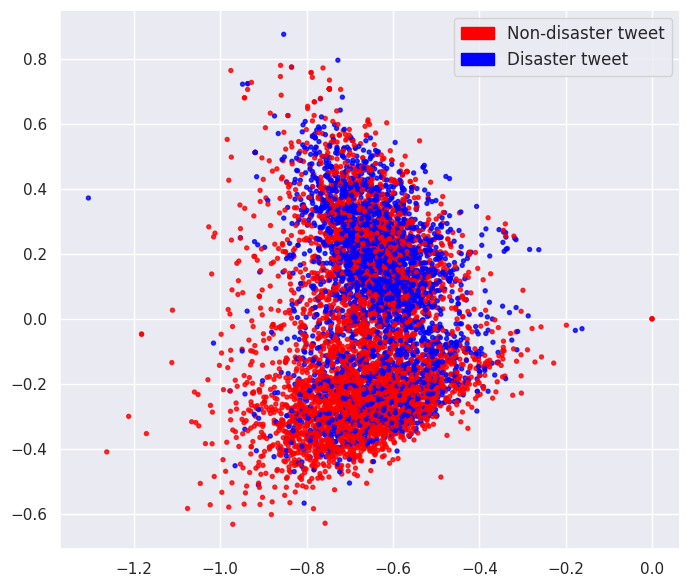

In [ ]:
X = get_word2vec_embeddings(word2vec, data_train['corrected tokens'])
y = data_train['target'].tolist()

fig = plt.figure(figsize=(8, 7))
plot_embedding(X, y)
plt.show()

In [ ]:
X_csr = scipy.sparse.csr_matrix(X)
f1_score_df(X_csr, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,Classifier,Average F1-score
0,Logistic Regression,0.763464
1,KNN Classifier,0.722389
2,Decision Tree,0.641180
3,SVM (linear kernel),0.763420
4,SVM (RBF kernel),0.782541
5,Random Forest,0.741966
6,Stochastic Gradient Descent,0.754826
7,Ridge Classifier,0.759793
8,XGBoost Classifier,0.753549


##Observation
Upto now al the model have improved but SVM(RBF) has improved the most.

In [ ]:
svm_rbf_final = svm.SVC(C = 2.0, kernel = 'rbf', degree = 3, gamma = 'scale', coef0 = 0.0, shrinking = True, probability = False, tol = 0.0001, cache_size = 200, class_weight = 'balanced', verbose = False, max_iter = -1, decision_function_shape = 'ovr', break_ties = False, random_state = 0)

In [ ]:
svm_rbf_final.fit(X_csr, y)

SVC(C=2.0, class_weight='balanced', random_state=0, tol=0.0001)

In [ ]:
data_test["corrected text"] = data_test["text"].apply(convert_to_lowercase).apply(convert_contractions)
data_test["corrected tokens"] = data_test["corrected text"].apply(regexp.tokenize)

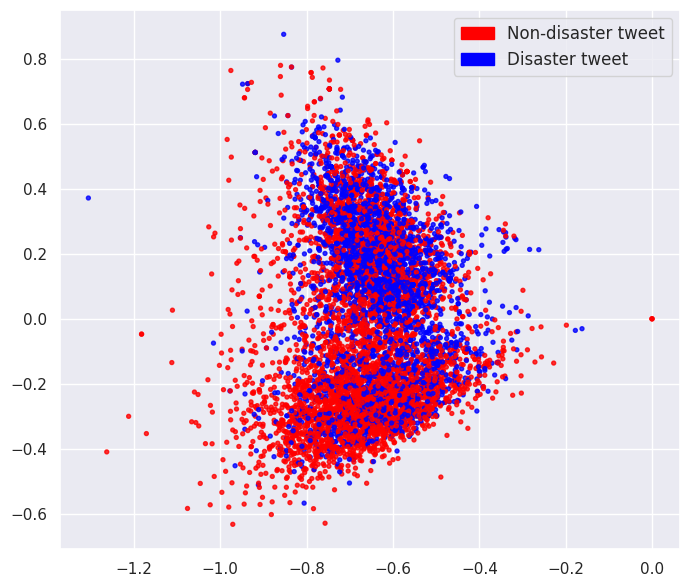

In [ ]:
X_test = get_word2vec_embeddings(word2vec, data_test['corrected tokens'])

fig = plt.figure(figsize=(8, 7))
plot_embedding(X, y)
plt.show()

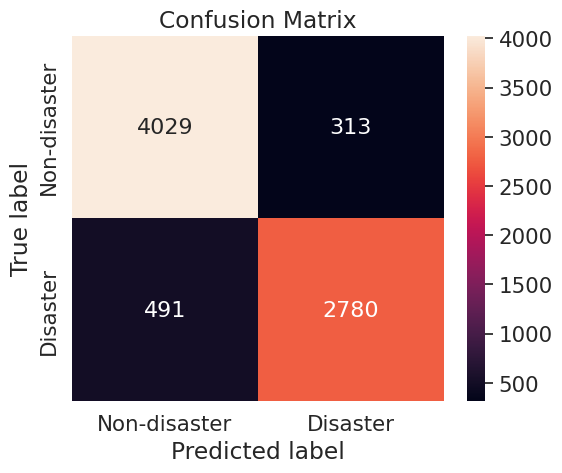

ValueError: Must pass 2-d input. shape=()

In [ ]:
sns.heatmap(confusion_matrix(y, svm_rbf_final.predict(X_csr)), annot=True)

In [ ]:
#Using SVM RBF to pridicting
y_pred = svm_rbf_final.predict(X_test)

In [ ]:
import pandas as pd

submission_df = pd.DataFrame({
    'id': data_test['id'],
    'target': y_pred
})


submission_df.to_csv('submission.csv', index=False)

# Transformer-based model (like BERT or its variants)

In [ ]:
!pip install transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import torch


In [ ]:
train_df, val_df = train_test_split(data_train, test_size=0.1, stratify=data_train['target'], random_state=42)

# Rename columns to match HuggingFace expectations
train_df = train_df.rename(columns={'text': 'text', 'target': 'label'})
val_df = val_df.rename(columns={'text': 'text', 'target': 'label'})

# Convert to HuggingFace Dataset format
train_dataset = Dataset.from_pandas(train_df[['text', 'label']])
val_dataset = Dataset.from_pandas(val_df[['text', 'label']])

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_function(example):
    return tokenizer(example['text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)


train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
val_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/6851 [00:00<?, ? examples/s]

Map:   0%|          | 0/762 [00:00<?, ? examples/s]

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install wandb
import wandb
import os

os.environ["WANDB_DISABLED"] = "true"


training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    report_to = None
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)


<ipython-input-78-62670ca281bb>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.476000,0.398399
2,0.314900,0.399161
3,0.226000,0.514044


TrainOutput(global_step=1287, training_loss=0.3234681734857211, metrics={'train_runtime': 1853.7415, 'train_samples_per_second': 11.087, 'train_steps_per_second': 0.694, 'total_flos': 5407721520814080.0, 'train_loss': 0.3234681734857211, 'epoch': 3.0})

In [ ]:
# predictions
predictions_output = trainer.predict(val_dataset)

# Extract labels and predicted classes
y_true = predictions_output.label_ids
y_pred = predictions_output.predictions.argmax(axis=1)

# Computing F1 score
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)


F1 Score: 0.8092307692307692


#Observation
This Transformer like model gives best score uptonow and it is specifically used for nlp task so that is what we are using this model for finalized prediction


In [ ]:
data_test["corrected text"] = data_test["text"].apply(convert_to_lowercase).apply(convert_contractions)
test_ds = Dataset.from_pandas(data_test[['text']].rename(columns={"text": "text"}))
test_ds = test_ds.map(tokenize_function, batched=True)
test_ds.set_format(type='torch', columns=['input_ids', 'attention_mask'])

predictions = trainer.predict(test_ds)
pred_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1)

Map:   0%|          | 0/3263 [00:00<?, ? examples/s]

In [ ]:
submission = pd.DataFrame({
    'id': data_test['id'],
    'target': pred_labels.numpy()
})
submission.to_csv("submission.csv", index=False)